In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from plotly.offline import download_plotlyjs
#from plotly.offline import plot
#from plotly.offline import download_plotlyjs
#from plotly.offline import iplot
#from plotly.offline import init_notebook_mode
#import requests
from time import time
from time import sleep
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import hierarchical
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
#from bs4 import BeautifulSoup
#import chromedriver_binary
##from selenium import webdriver
#from selenium.webdriver.common.action_chains import ActionChains
#from selenium.webdriver.common.by import By
#from selenium.webdriver.support.select import Select
from urllib import parse
from urllib import request
from urllib import response
from urllib import robotparser
#init_notebook_mode(connected=True)
% matplotlib inline

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [5]:
imdb = pd.read_csv(r'imdb.csv')

In [6]:
len(imdb)

14761

In [7]:
imdb.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h'],
      dtype='object')

In [8]:
len(imdb)

14761

# PART - 1 (CLEANING) :- 

## Viewing first 5 rows of the imdb dataset:

In [9]:
imdb.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,War,Western,a,b,c,d,e,f,g,h
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning:

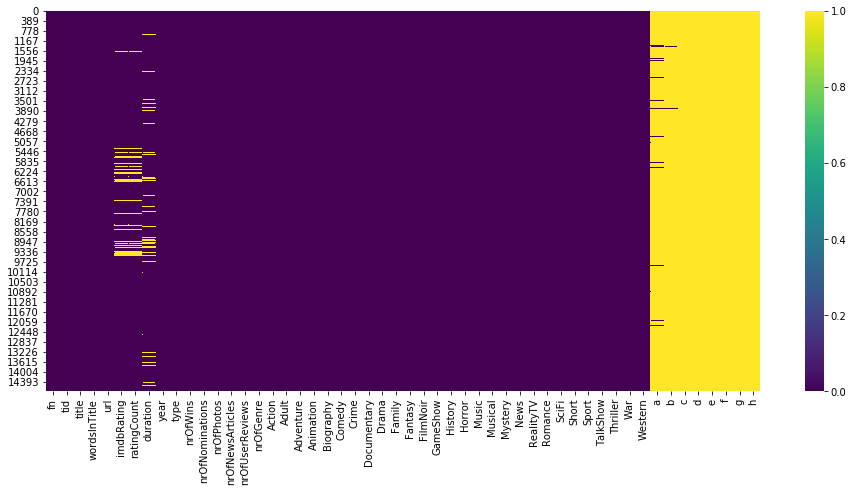

In [10]:
plt.figure(figsize=(16,7))
sns.heatmap(data = imdb.isnull(), cmap='viridis')

## 1.) Removing all the empty columns:

In [11]:
imdb['e'].nunique()

0

In [12]:
imdb['f'].nunique()

0

In [13]:
imdb['g'].nunique()

0

In [14]:
imdb['h'].nunique()

0

In [15]:
del imdb['e']
del imdb['f']
del imdb['g']
del imdb['h']

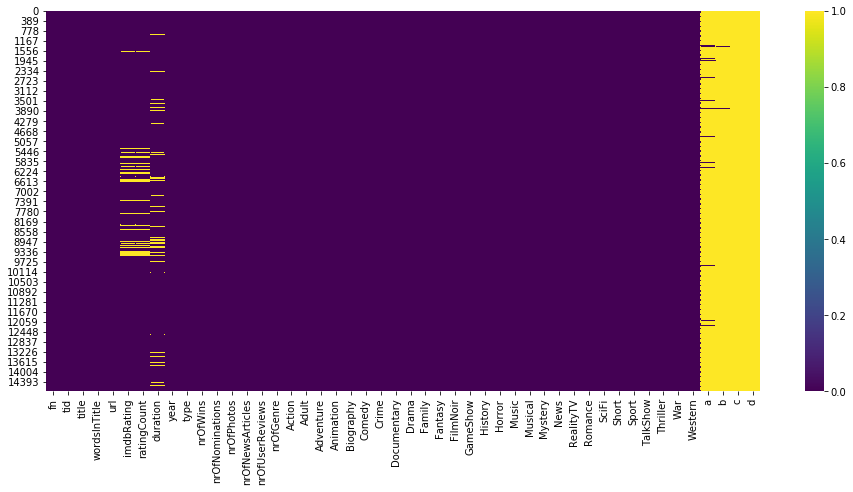

In [16]:
plt.figure(figsize=(16,7))
sns.heatmap(data = imdb.isnull(), cmap='viridis')

## 2.) Fixing the values of 'imdbRating' column that contained urls(http:):

In [17]:
col = imdb.columns[5:45]
col=list(col)

In [18]:
len(col)

40

In [19]:
col

['imdbRating',
 'ratingCount',
 'duration',
 'year',
 'type',
 'nrOfWins',
 'nrOfNominations',
 'nrOfPhotos',
 'nrOfNewsArticles',
 'nrOfUserReviews',
 'nrOfGenre',
 'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'FilmNoir',
 'GameShow',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'RealityTV',
 'Romance',
 'SciFi',
 'Short',
 'Sport',
 'TalkShow',
 'Thriller',
 'War',
 'Western',
 'a']

In [20]:
col[39]

'a'

In [21]:
col[38]

'Western'

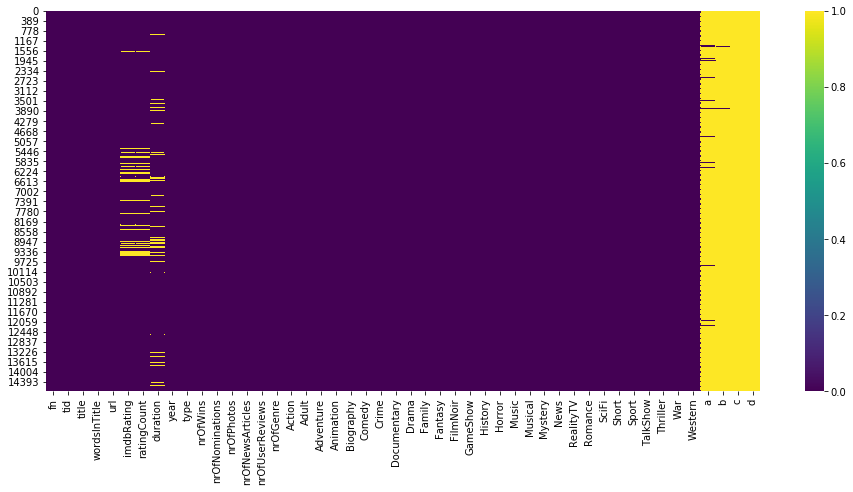

In [23]:
plt.figure(figsize=(16,7))
sns.heatmap(data = imdb.isnull(), cmap='viridis')

In [24]:
len(imdb['imdbRating'])

14761

# 3.) Removing rows that contains text/string in 'imdbRating' column:

In [25]:
remove_row = []

In [26]:
remove_row

[]

In [27]:
for i in range(0,len(imdb['imdbRating'])):
    try:
        value = imdb.ix[i,'imdbRating'] 
        value = str(value)
        value = value.strip()
        value = value.lower()
        r = re.search(r'[a-z]', value)
        if r.start() >= 0:
            remove_row.append(i)
            
    except:
        continue

In [28]:
len(imdb)

14761

In [29]:
for each in remove_row:
    imdb.drop(each, inplace=True)

In [30]:
len(imdb)

13513

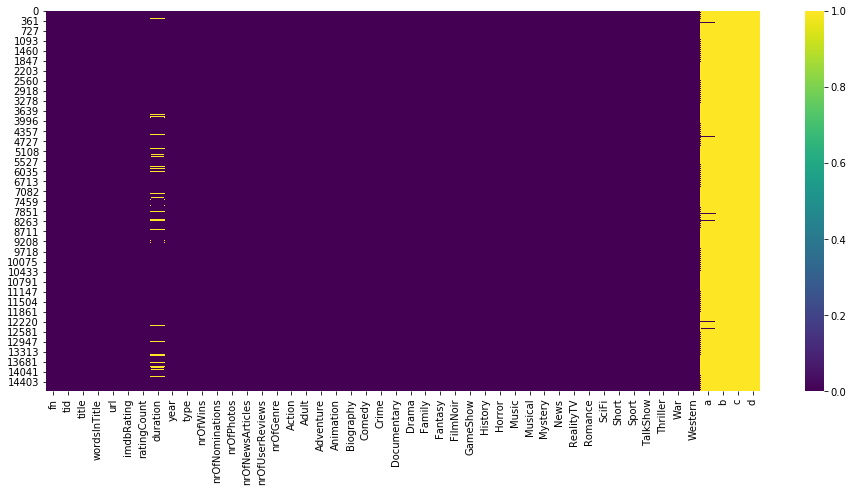

In [31]:
plt.figure(figsize=(16,7))
sns.heatmap(data = imdb.isnull(), cmap='viridis')

In [32]:
imdb.to_csv(r'Clean_IMDB_Original.csv', index=False)

## 4.) Removing all the rows that contain NaN values in columns('imdbRating' and                                'ratingCount'):

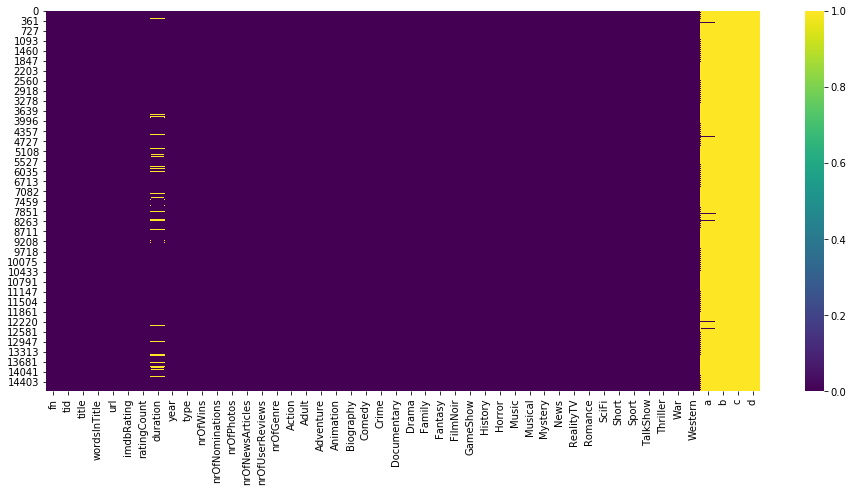

In [33]:
plt.figure(figsize=(16,7))
sns.heatmap(data = imdb.isnull(), cmap='viridis')

In [34]:
imdb.dropna(axis='rows',how='all',inplace=True)

In [35]:
len(imdb)

13513

In [36]:
imdb.dropna(axis='rows', subset=['imdbRating', 'ratingCount', 'duration'], inplace=True)

In [37]:
len(imdb)

12755

In [38]:
imdb.dropna(axis='rows', subset=['imdbRating', 'ratingCount'], inplace=True)

In [39]:
len(imdb)

12755

In [40]:
imdb.dropna(axis='rows', subset=['imdbRating'],inplace=True)

In [41]:
len(imdb)

12755

In [42]:
imdb.dropna(axis='rows', subset=['ratingCount'],inplace=True)

In [43]:
len(imdb)

12755

### Output file:

In [44]:
imdb.to_csv(r'Clean_IMDB_1.csv',index=False)

## 5.) Removing the columns not required:

In [45]:
del imdb['fn']

In [46]:
del imdb['tid']

In [47]:
del imdb['wordsInTitle']

In [48]:
del imdb['url']

In [49]:
del imdb['type']

In [50]:
del imdb['duration']

In [51]:
del imdb['year']

In [52]:
del imdb['title']

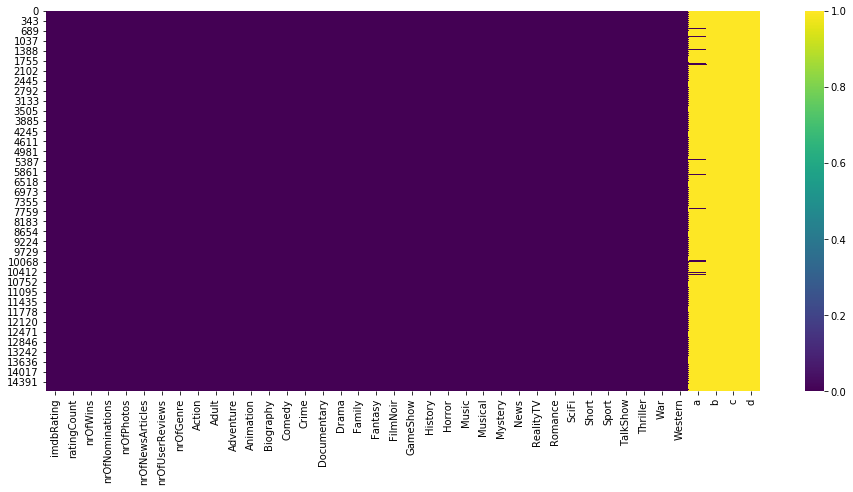

In [53]:
plt.figure(figsize=(16,7))
sns.heatmap(data = imdb.isnull(), cmap='viridis')

# 6.) Clean File output:

In [54]:
imdb.to_csv(r'Clean_IMDB_2.csv',index=False)

## The unclean dataset -'imdb.csv' has successfully been cleared:

### > Cell values present in the imdbRating column that contained urls has been rectified

### > Cell values present in the imdbRating column that contained text/name of movie has been removed/deleted from the dataset

### > Cell values present in the imdbRating column that contained NaN empty values has been removed/deleted from the dataset

# 7.) Removing columns 'a', 'b', 'c', 'd':  

In [55]:
del imdb['a']

In [56]:
del imdb['b']

In [57]:
del imdb['c']

In [58]:
del imdb['d']

###   $ original length of imdb dataset = 14761

### $ new length of the imdb dataset = 12755

### $ rows eliminated = 2006 

In [59]:
imdb.to_csv(r'Clean_IMDB_3.csv', index=False)

# Importing the new clean dataset:

In [60]:
imdb_clean = pd.read_csv(r'Clean_IMDB_3.csv')

In [61]:
imdb_clean.head()

,imdbRating,ratingCount,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,8.4,40550,1,0,19,96.0,85.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.3,45319,2,1,35,110.0,122.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.4,81007,3,4,67,428.0,376.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.3,37521,1,1,53,123.0,219.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.7,70057,2,0,38,187.0,186.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
imdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12755 entries, 0 to 12754
Data columns (total 36 columns):
imdbRating          12755 non-null float64
ratingCount         12755 non-null int64
nrOfWins            12755 non-null int64
nrOfNominations     12755 non-null int64
nrOfPhotos          12755 non-null int64
nrOfNewsArticles    12755 non-null float64
nrOfUserReviews     12755 non-null float64
nrOfGenre           12755 non-null float64
Action              12755 non-null float64
Adult               12755 non-null float64
Adventure           12755 non-null float64
Animation           12755 non-null float64
Biography           12755 non-null float64
Comedy              12755 non-null float64
Crime               12755 non-null float64
Documentary         12755 non-null float64
Drama               12755 non-null float64
Family              12755 non-null float64
Fantasy             12755 non-null float64
FilmNoir            12755 non-null float64
GameShow            12755 non-null floa

In [63]:
imdb_clean.describe()

,imdbRating,ratingCount,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,12755.000000,1.275500e+04,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,...,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000
mean,6.873751,2.794409e+04,3.528734,5.131635,26.613799,281.687025,118.847197,2.327558,0.162132,0.001254,...,0.003606,0.005174,0.141356,0.072207,0.033791,0.017091,0.011603,0.099569,0.036299,0.024931
std,1.100871,6.667061e+04,9.798640,16.925470,64.416505,1085.244582,242.590734,0.771100,0.368587,0.035397,...,0.059948,0.071750,0.348402,0.258840,0.180697,0.129617,0.107096,0.299436,0.187042,0.155922
min,1.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,7.965000e+02,0.000000,0.000000,2.000000,0.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.635000e+03,0.000000,0.000000,10.000000,17.000000,42.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.324850e+04,3.000000,4.000000,30.000000,135.000000,122.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.600000,1.183395e+06,226.000000,542.000000,1436.000000,25582.000000,4928.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plotting basics plots from the DataFrame:

#   ratingcount vs imdbrating :

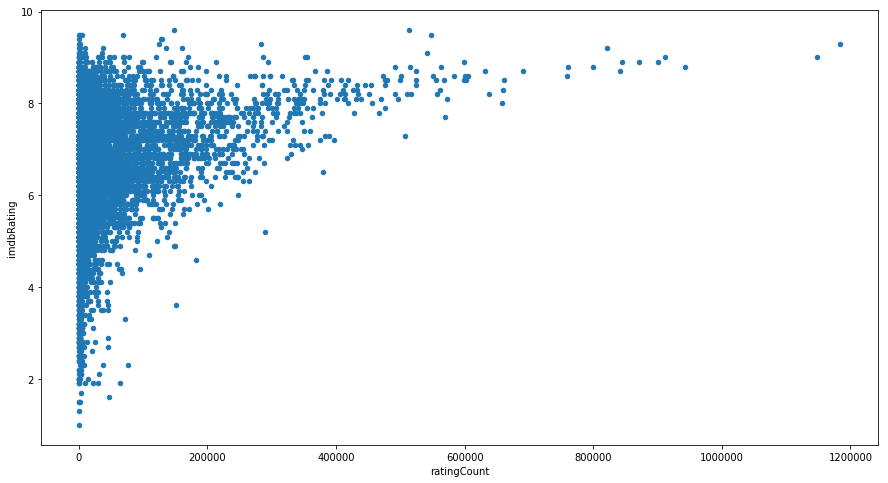

In [64]:
imdb_clean.plot(x='ratingCount', y='imdbRating', kind='scatter', figsize=(15,8))

# nrofwins vs imdbrating :

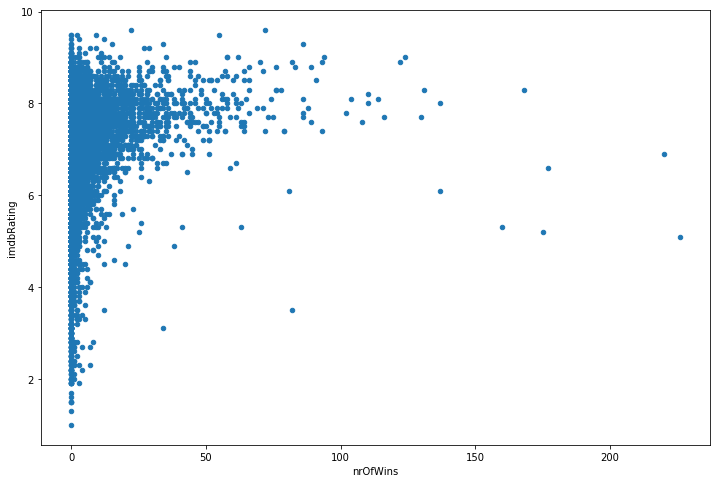

In [65]:
imdb_clean.plot(x='nrOfWins', y='imdbRating',kind='scatter', figsize=(12,8))

#  nrofnominations vs imdbrating: 

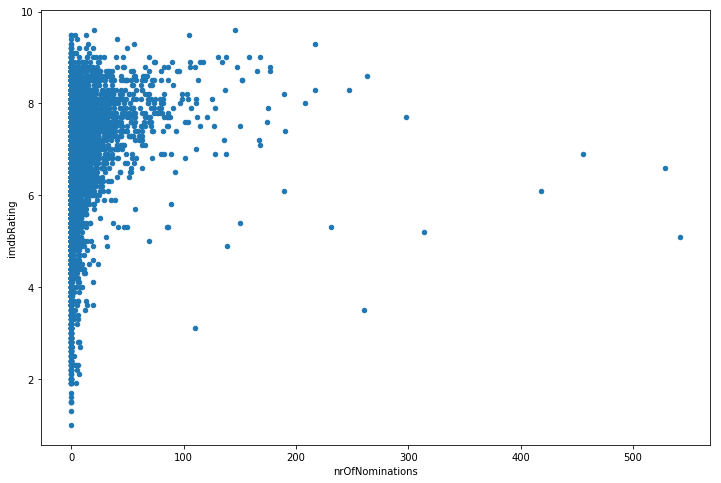

In [66]:
imdb_clean.plot(x='nrOfNominations', y='imdbRating', kind='scatter', figsize=(12,8))

# nrOfPhotos vs imdb rating : 

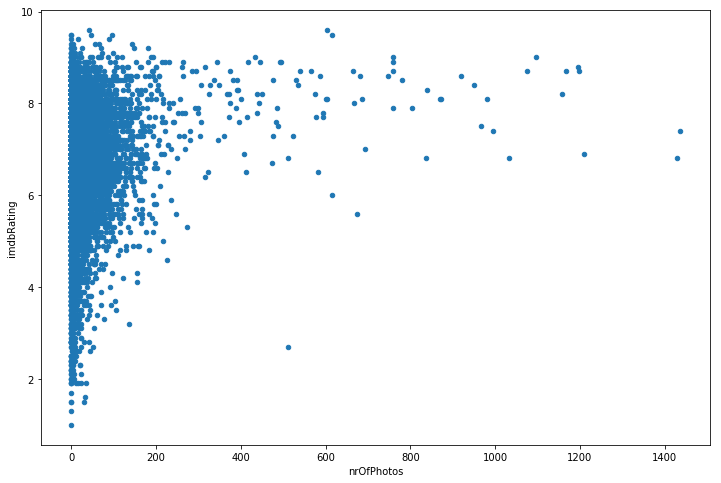

In [67]:
imdb_clean.plot(x='nrOfPhotos', y='imdbRating', kind='scatter', figsize=(12,8))

# nrOfNewsArticles vs imdb rating:

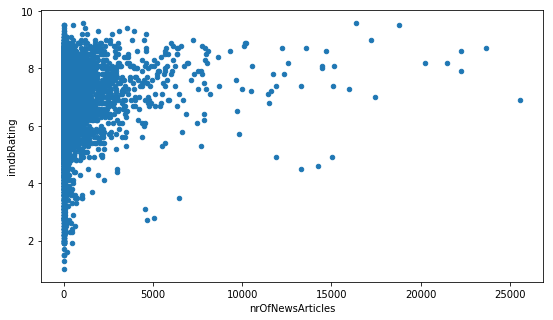

In [68]:
imdb_clean.plot(x='nrOfNewsArticles', y='imdbRating', kind='scatter', figsize=(9,5))

# nrOfUserReviews vs imdb rating :

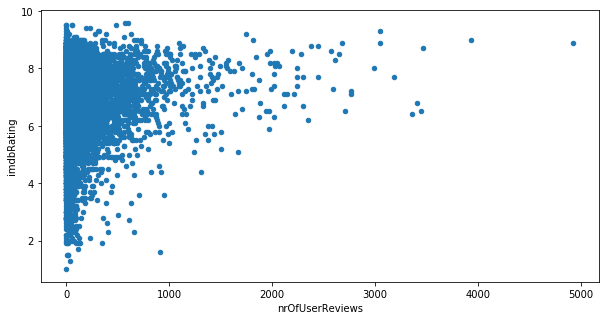

In [69]:
imdb_clean.plot(x='nrOfUserReviews', y='imdbRating', kind='scatter', figsize=(10,5))

#  nrOfGenre vs imdb rating :

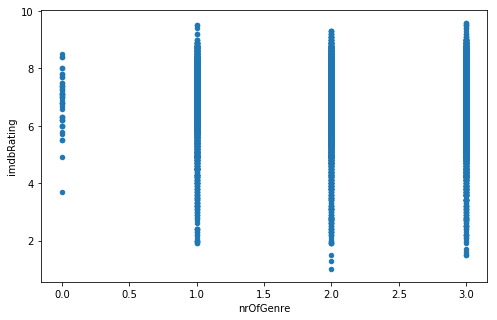

In [70]:
imdb_clean.plot(x='nrOfGenre', y='imdbRating', kind='scatter', figsize=(8,5))

## Analysis Plots : -

In [71]:
imdb_clean.columns

Index(['imdbRating', 'ratingCount', 'nrOfWins', 'nrOfNominations',
       'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'FilmNoir',
       'GameShow', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport', 'TalkShow',
       'Thriller', 'War', 'Western'],
      dtype='object')

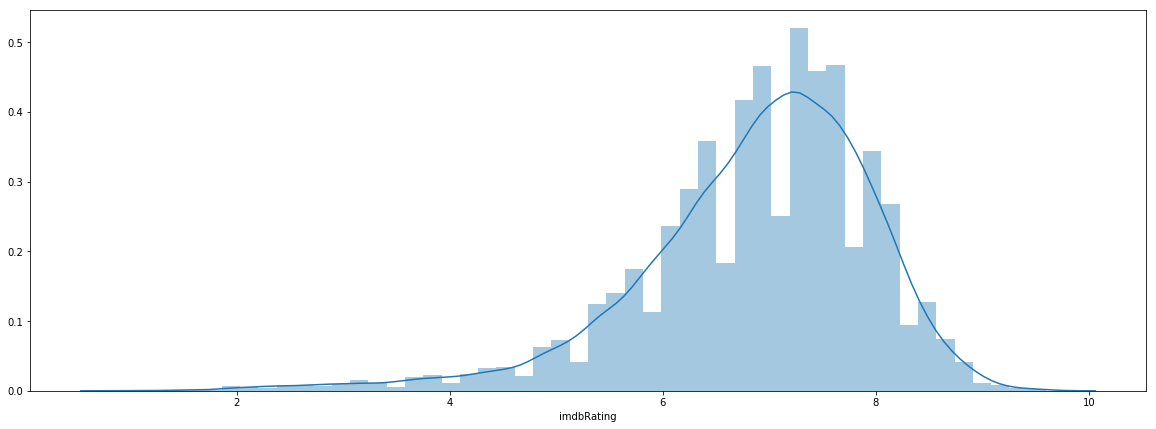

In [72]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['imdbRating'])

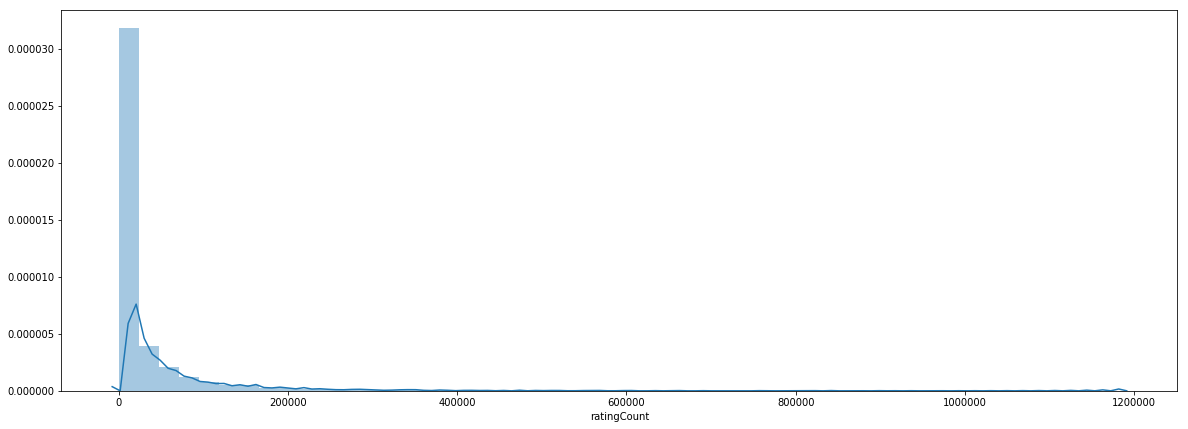

In [73]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['ratingCount'])

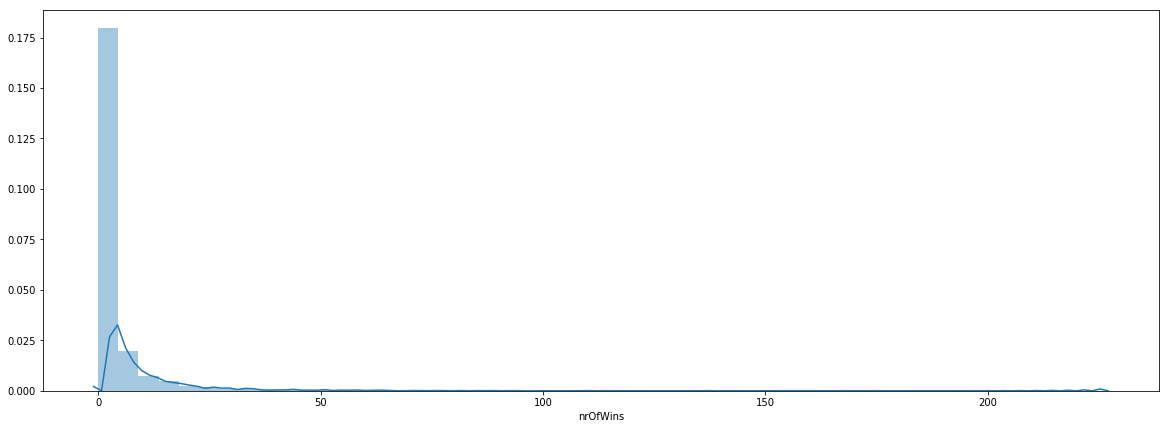

In [74]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['nrOfWins'])

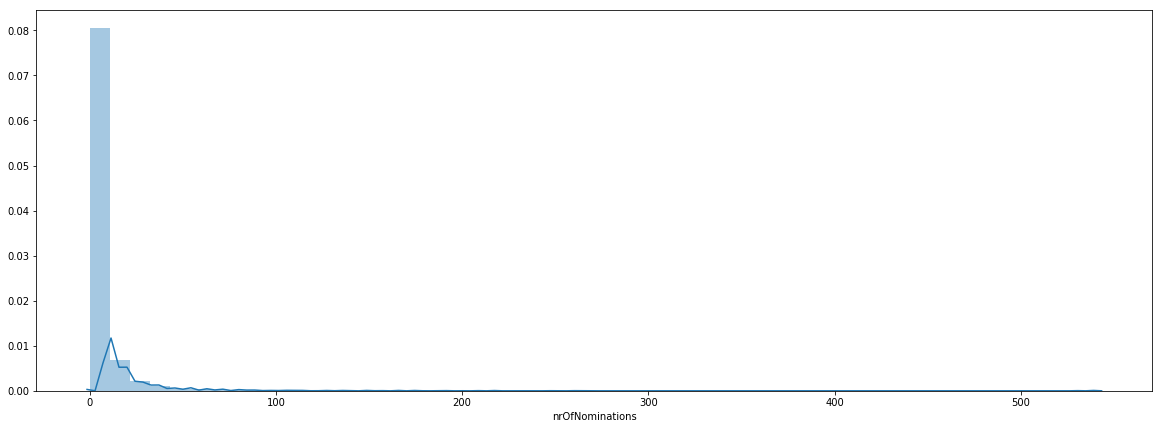

In [75]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['nrOfNominations'])

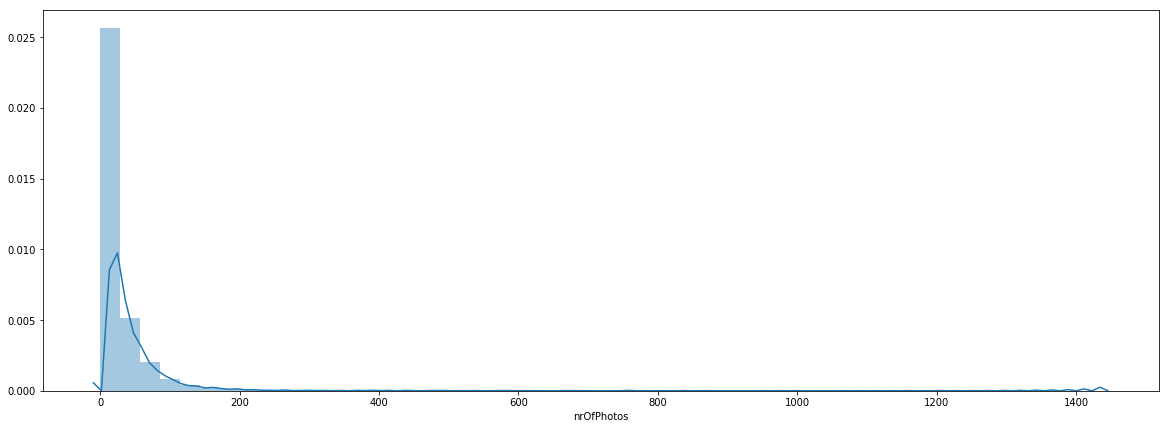

In [76]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['nrOfPhotos'])

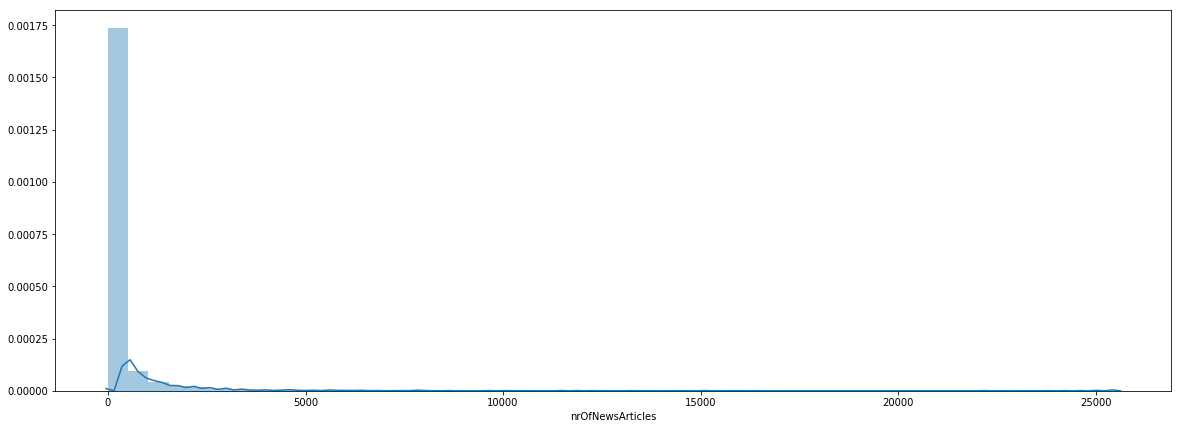

In [77]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['nrOfNewsArticles'])

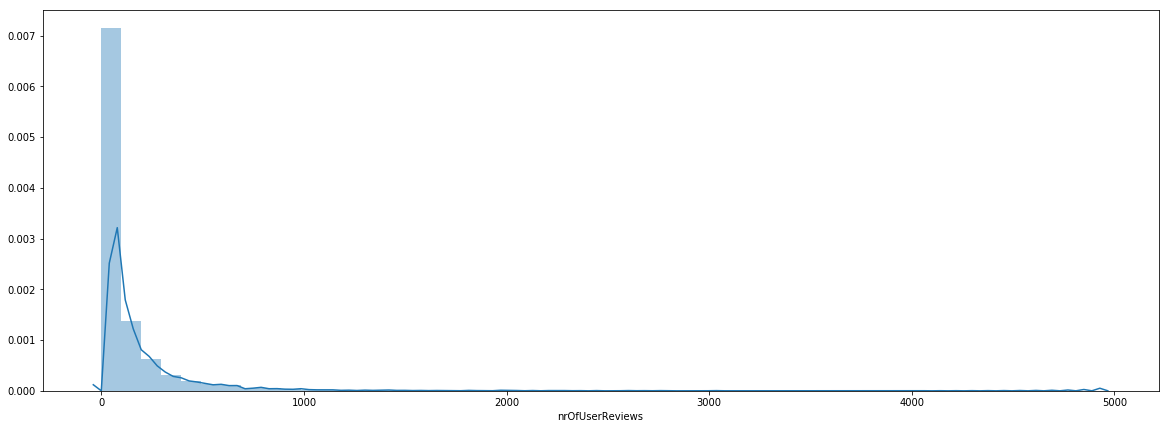

In [78]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['nrOfUserReviews'])

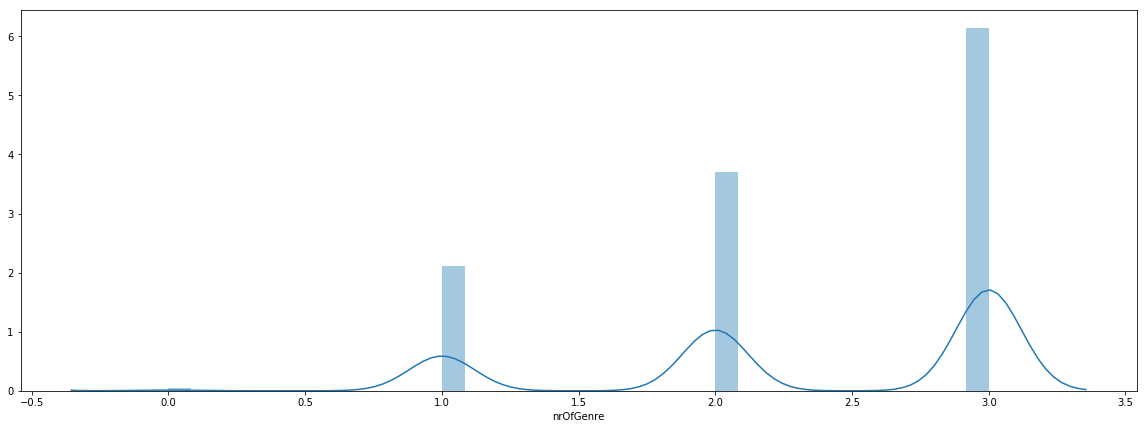

In [79]:
plt.figure(figsize=(20,7))
sns.distplot(a=imdb_clean['nrOfGenre'])

### Genre Category Analysis Plots:-

In [80]:
imdb_clean.columns[8:]

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'FilmNoir',
       'GameShow', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport', 'TalkShow',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [81]:
genre = input("genre choice: ")
print(genre)

genre choice: Action
Action


C:\anaconda5\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


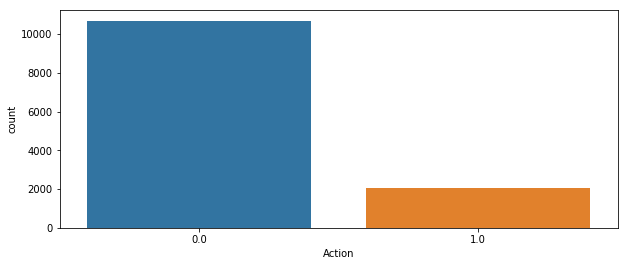

In [82]:
plt.figure(figsize=(10,4))
sns.countplot(x=genre, data=imdb_clean)

# PART - II :-  

# REGRESSION ANALYSIS :- 

# LINEAR REGRESSION MODEL:

In [83]:
imdb_clean.columns

Index(['imdbRating', 'ratingCount', 'nrOfWins', 'nrOfNominations',
       'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'FilmNoir',
       'GameShow', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport', 'TalkShow',
       'Thriller', 'War', 'Western'],
      dtype='object')

### Linear Regression on 'imdbRating' vs ['ratingCount', 'nrOfWins', 'nrOfNominations','nrOfPhotos',   'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre]

In [84]:
X = imdb_clean[['ratingCount', 'nrOfWins', 'nrOfNominations','nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre']].values
y = imdb_clean['imdbRating'].values

In [85]:
from sklearn.cross_validation import train_test_split

C:\anaconda5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
y_pred = lin.predict(X_test)

#### Intercept:

In [90]:
lin.intercept_

6.8807059858654087

#### Coefficient :

In [91]:
lin.coef_

array([  4.40537442e-06,   2.52954169e-02,  -4.48029535e-03,
         9.19194728e-04,  -5.11402708e-05,  -8.87703749e-04,
        -4.18529444e-02])

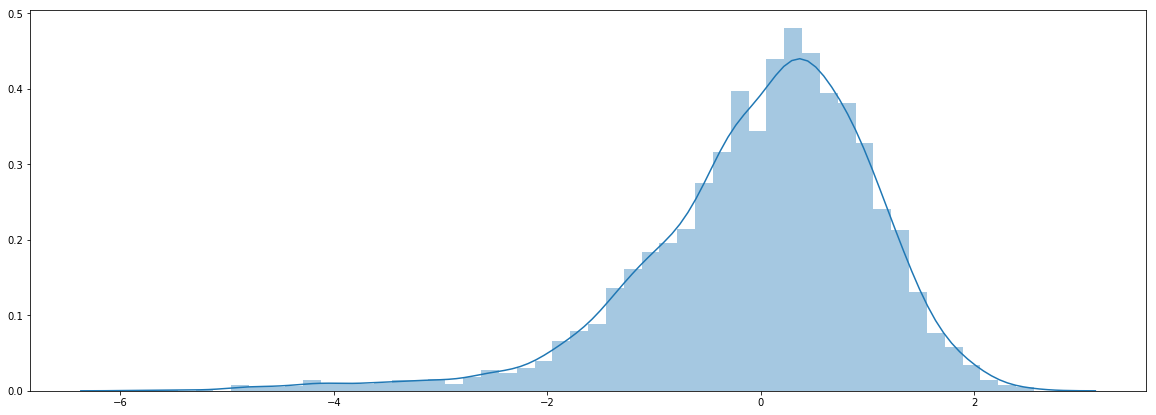

In [92]:
plt.figure(figsize=(20,7))
sns.distplot((y_test-y_pred))

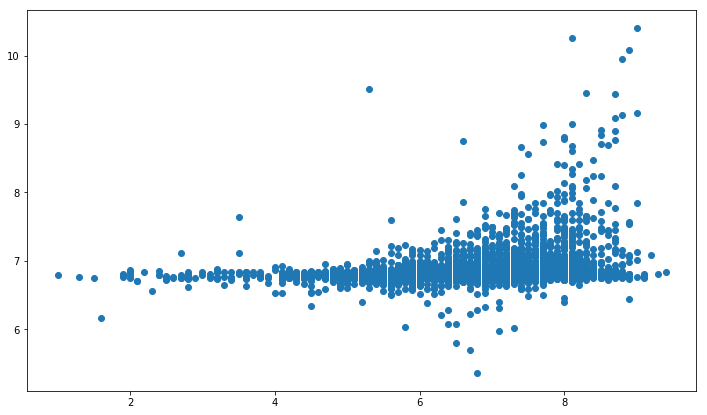

In [93]:
plt.figure(figsize=(12,7))
plt.scatter(y_test, y_pred)
plt.show()

In [94]:
cdf = pd.DataFrame()

In [95]:
cdf['coeff'] = lin.coef_

In [96]:
cdf.index = ['ratingCount', 'nrOfWins', 'nrOfNominations','nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre']

In [97]:
cdf

,coeff
ratingCount,0.000004
nrOfWins,0.025295
nrOfNominations,-0.004480
nrOfPhotos,0.000919
nrOfNewsArticles,-0.000051
nrOfUserReviews,-0.000888
nrOfGenre,-0.041853


#### Prediction random :

In [98]:
# Random Prediction:
prediction = np.array([[ 70550, 1, 0, 19, 96.0, 85.0, 3.0]])
lin.predict(prediction)

array([ 7.02834215])

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [100]:
# Mean absolute error: 
mean_absolute_error(y_test, y_pred)

0.81424983846660337

In [101]:
# Mean squared error:
mean_squared_error(y_test, y_pred)

1.1692366559333003

In [102]:
# Root mean squared error:
np.sqrt(mean_squared_error(y_test, y_pred))

1.0813124691472398

### Linear regression model on individual parameters:-

#### a.) imdbRating on RatingCount:

In [103]:
X = imdb_clean[['ratingCount']].values
y = imdb_clean['imdbRating'].values

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
lin_reg = LinearRegression()

In [107]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
y_pred = lin_reg.predict(X)

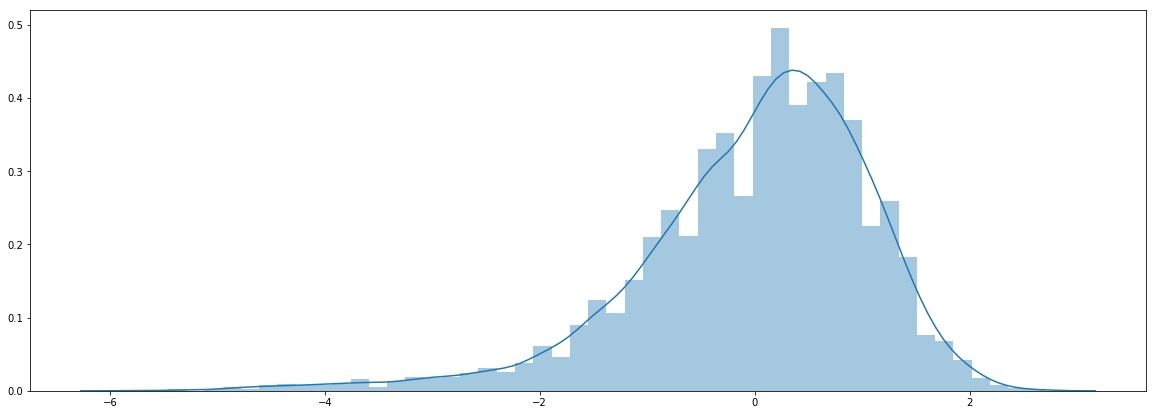

In [109]:
plt.figure(figsize=(20,7))
sns.distplot((y-y_pred))

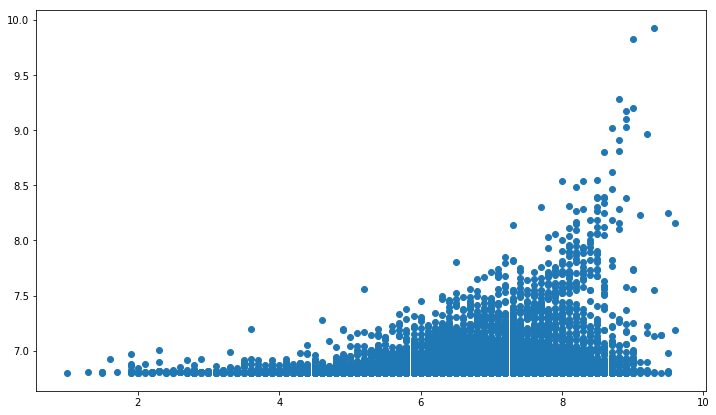

In [110]:
plt.figure(figsize=(12,7))
plt.scatter(y, y_pred)
plt.show()

In [111]:
lin_reg.intercept_

6.7999880995768818

In [112]:
lin_reg.coef_

array([  2.63967664e-06])

In [113]:
cdf = pd.DataFrame()
cdf['coef'] = lin_reg.coef_
cdf.index = ['ratingCount']

In [114]:
cdf

,coef
ratingCount,0.000003


In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [116]:
# Mean absolute error:
mean_absolute_error(y, y_pred)

0.82507963886085056

In [117]:
# Mean absolute error:
mean_squared_error(y, y_pred)

1.180852541983489

In [118]:
# Root Mean square error:
np.sqrt(mean_squared_error(y, y_pred))

1.0866703925218029

In [119]:
y_pred = lin_reg.predict(X)

### Plotting the Linear Regression Model (Entire dataset @100%) :- 

In [120]:
list_X = []
for each in X:
    list_X.append(each[0])
X = list_X
X = np.array(X)

In [121]:
X

array([40550, 45319, 81007, ...,     8,    20,    89], dtype=int64)

In [122]:
z = pd.DataFrame()
z['X'] = X
z['y'] = y
z['y_pred'] = y_pred

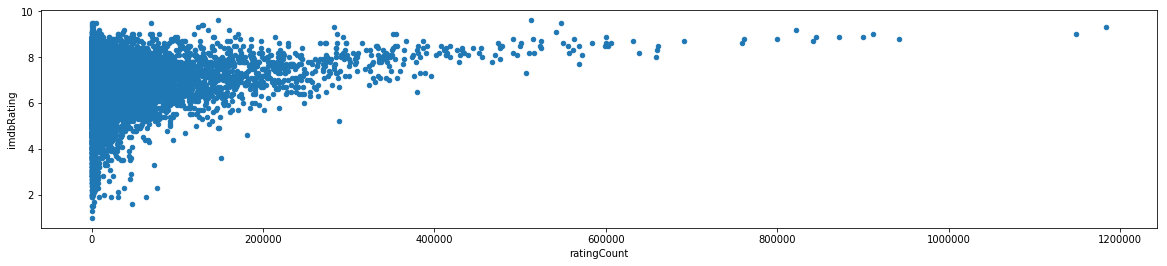

In [123]:
imdb_clean.plot(x='ratingCount', y='imdbRating', kind='scatter', figsize=(20,4))

### Model Fitted Plot :-

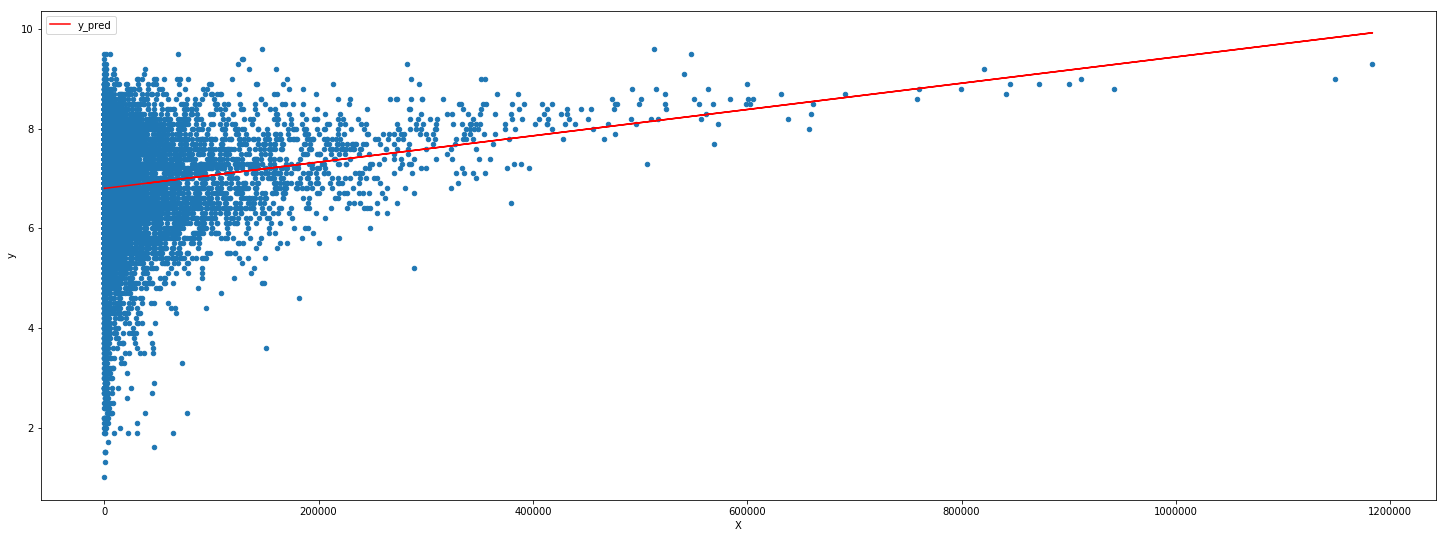

In [124]:
ax = z.plot(x='X', y='y',kind='scatter',figsize=(30,9))
z.plot(x='X', y='y_pred', kind='line',ax=ax,color='red',figsize=(25,9))

#### Random Predictions:-

In [125]:
ratingCountValue = int(input("ratingCount value "))

ratingCount value 200000


In [126]:
lin_reg.predict(ratingCountValue)

array([ 7.32792343])

#### 2.) imdbRating on nrOfWins:

In [127]:
X = imdb_clean[['nrOfWins']].values
y = imdb_clean['imdbRating'].values

In [128]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lin_reg = LinearRegression()

In [131]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
y_pred = lin_reg.predict(X)

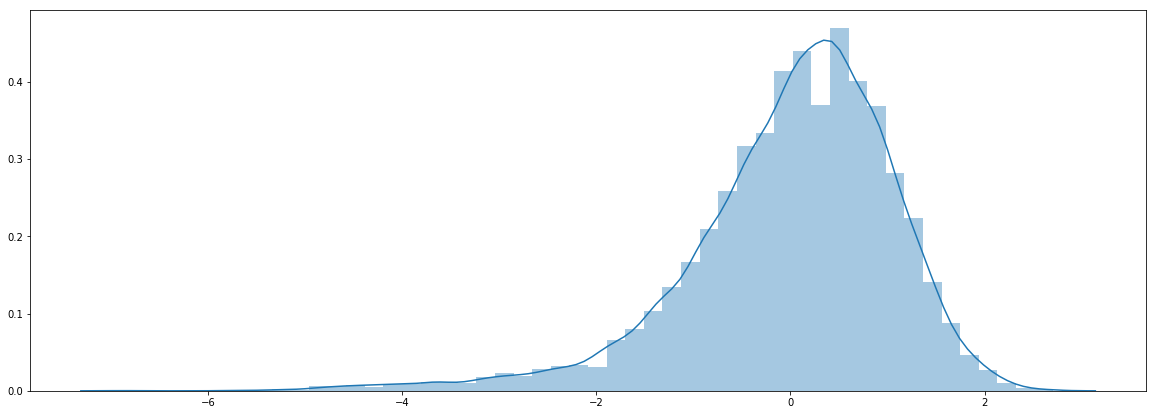

In [133]:
plt.figure(figsize=(20,7))
sns.distplot((y-y_pred))

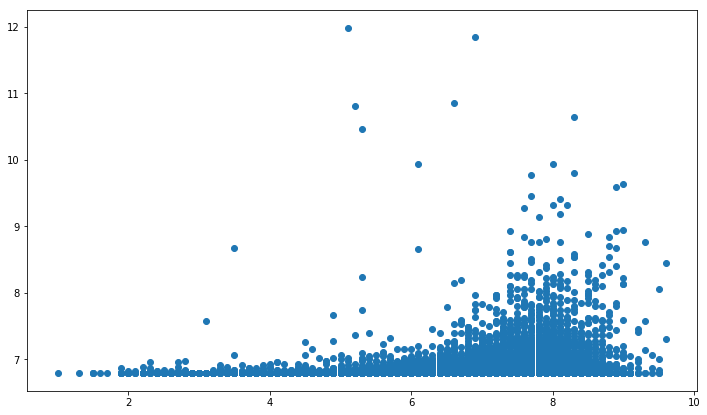

In [134]:
plt.figure(figsize=(12,7))
plt.scatter(y, y_pred)
plt.show()

In [135]:
lin_reg.intercept_

6.7927923849286467

In [136]:
lin_reg.coef_

array([ 0.02294281])

In [137]:
cdf = pd.DataFrame()
cdf['coef'] = lin_reg.coef_
cdf.index = ['nrOfWins']

In [138]:
cdf

,coef
nrOfWins,0.022943


In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [140]:
# Mean absolute error:
mean_absolute_error(y, y_pred)

0.80698063482343896

In [141]:
# Mean absolute error:
mean_squared_error(y, y_pred)

1.1612873418685186

In [142]:
# Root Mean square error:
np.sqrt(mean_squared_error(y, y_pred))

1.0776304291678658

In [143]:
y_pred = lin_reg.predict(X)

### Plotting the Linear Regression Model (Entire dataset @100%) :- 

In [144]:
list_X = []
for each in X:
    list_X.append(each[0])
X = list_X
X = np.array(X)

In [145]:
X

array([1, 2, 3, ..., 0, 0, 0], dtype=int64)

In [146]:
z = pd.DataFrame()
z['X'] = X
z['y'] = y
z['y_pred'] = y_pred

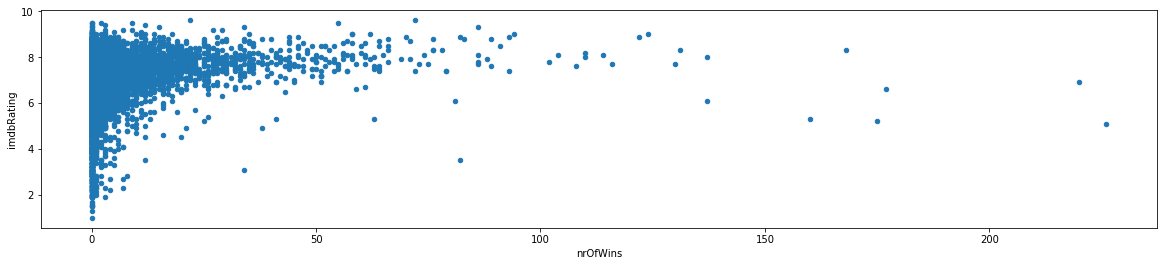

In [147]:
imdb_clean.plot(x='nrOfWins', y='imdbRating', kind='scatter', figsize=(20,4))

### Model Fitted Plot :-

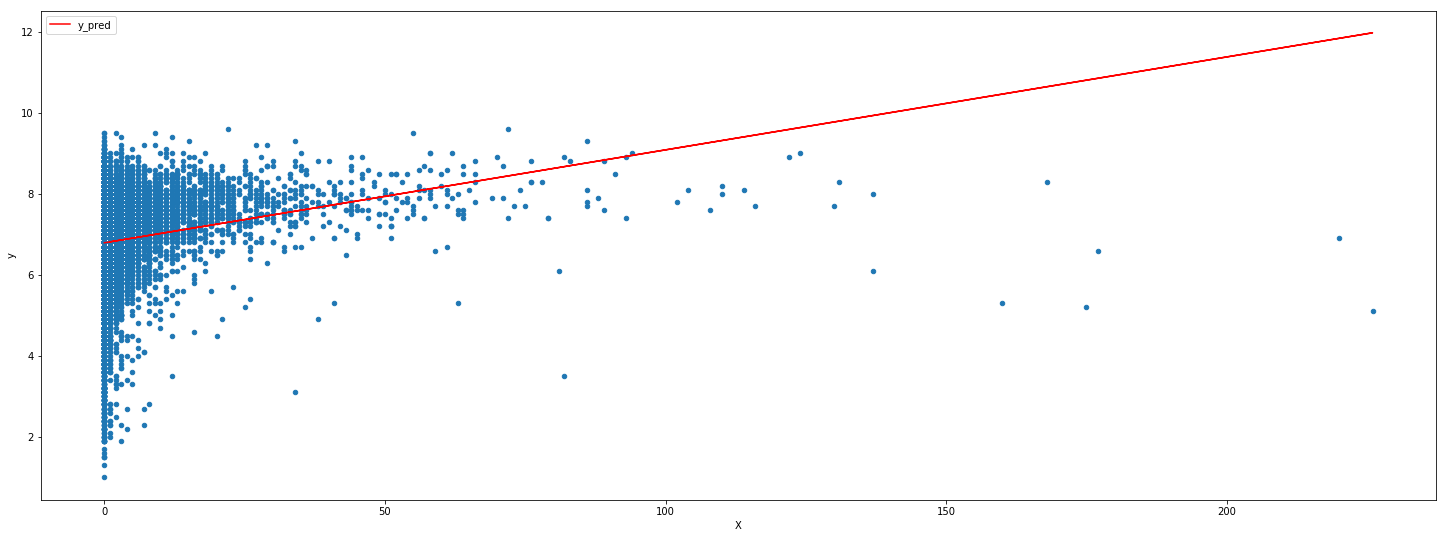

In [148]:
ax = z.plot(x='X', y='y',kind='scatter',figsize=(30,9))
z.plot(x='X', y='y_pred', kind='line',ax=ax,color='red', figsize=(25,9))

#### Random Predictions:-

In [149]:
nrOfWinsValue = int(input("nrOfWins value "))

nrOfWins value 50


In [150]:
lin_reg.predict(nrOfWinsValue)

array([ 7.9399331])

#### c.) imdbRating on nrOfNominations :

In [151]:
X = imdb_clean[['nrOfNominations']].values
y = imdb_clean['imdbRating'].values

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lin_reg = LinearRegression()

In [155]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
y_pred = lin_reg.predict(X)

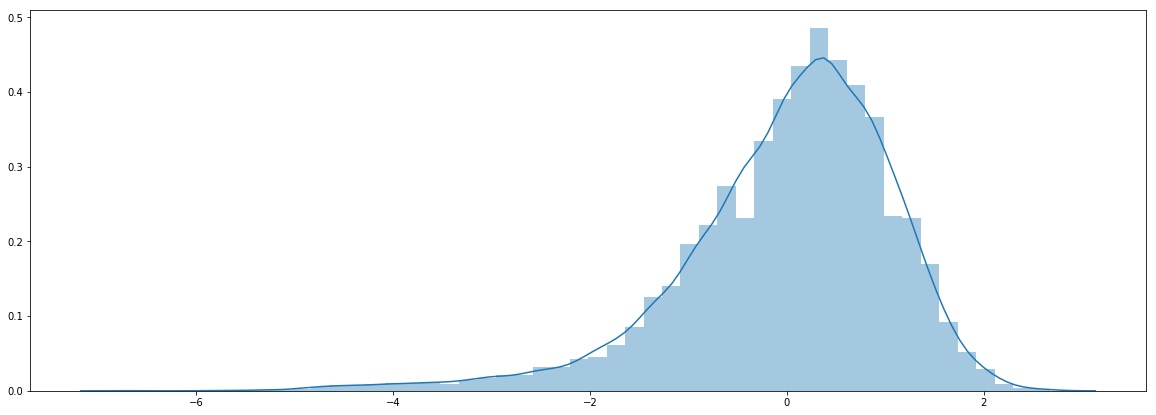

In [157]:
plt.figure(figsize=(20,7))
sns.distplot((y-y_pred))

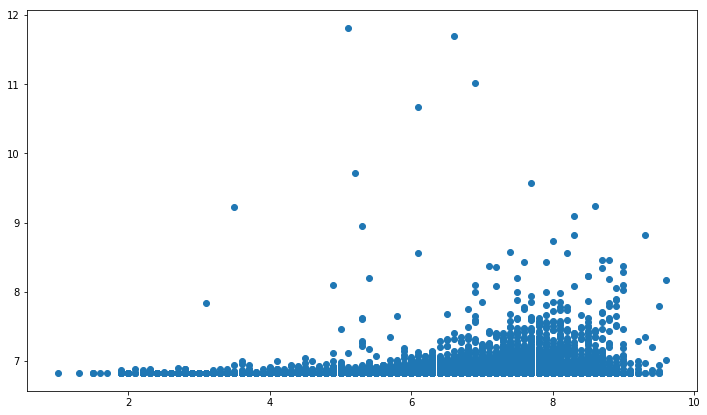

In [158]:
plt.figure(figsize=(12,7))
plt.scatter(y, y_pred)
plt.show()

In [159]:
lin_reg.intercept_

6.8265589458406808

In [160]:
lin_reg.coef_

array([ 0.00919639])

In [161]:
cdf = pd.DataFrame()
cdf['coef'] = lin_reg.coef_
cdf.index = ['nrOfNominations']

In [162]:
cdf

,coef
nrOfNominations,0.009196


In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [164]:
# Mean absolute error:
mean_absolute_error(y, y_pred)

0.8204856126733433

In [165]:
# Mean absolute error:
mean_squared_error(y, y_pred)

1.1875961493452827

In [166]:
# Root Mean square error:
np.sqrt(mean_squared_error(y, y_pred))

1.0897688513374213

In [167]:
y_pred = lin_reg.predict(X)

### Plotting the Linear Regression Model (Entire dataset @100%) :- 

In [168]:
list_X = []
for each in X:
    list_X.append(each[0])
X = list_X
X = np.array(X)

In [169]:
X

array([0, 1, 4, ..., 0, 0, 0], dtype=int64)

In [170]:
z = pd.DataFrame()
z['X'] = X
z['y'] = y
z['y_pred'] = y_pred

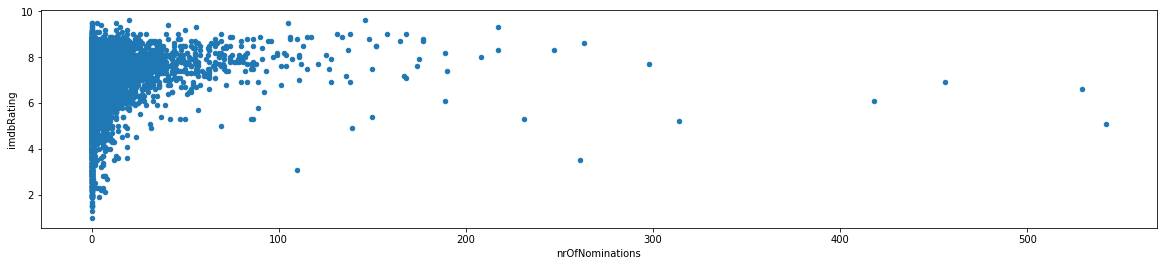

In [171]:
imdb_clean.plot(x='nrOfNominations', y='imdbRating', kind='scatter', figsize=(20,4))

### Model Fitted Plot :-

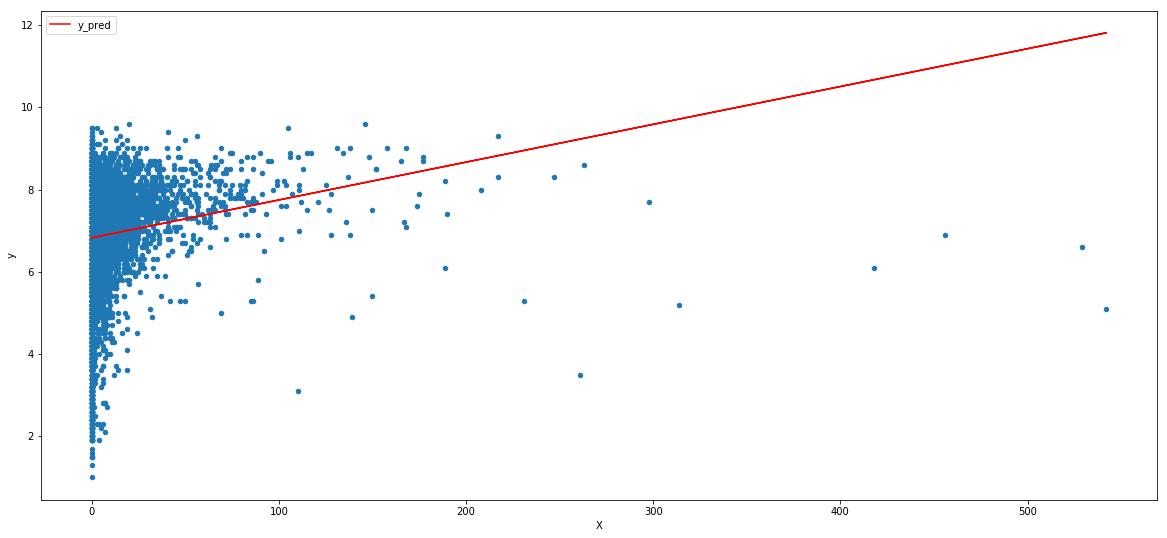

In [172]:
ax = z.plot(x='X', y='y',kind='scatter',figsize=(20,9))
z.plot(x='X', y='y_pred', kind='line',ax=ax,color='red', figsize=(20,9))

#### Random Predictions:-

In [173]:
nrOfNominationsValue = int(input("nrOfNominations value "))

nrOfNominations value 100


In [174]:
lin_reg.predict(nrOfNominationsValue)

array([ 7.74619815])

#### d.) imdbRating on 'nrOfPhotos':

In [175]:
X = imdb_clean[['nrOfPhotos']].values
y = imdb_clean['imdbRating'].values

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
lin_reg = LinearRegression()

In [179]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
y_pred = lin_reg.predict(X)

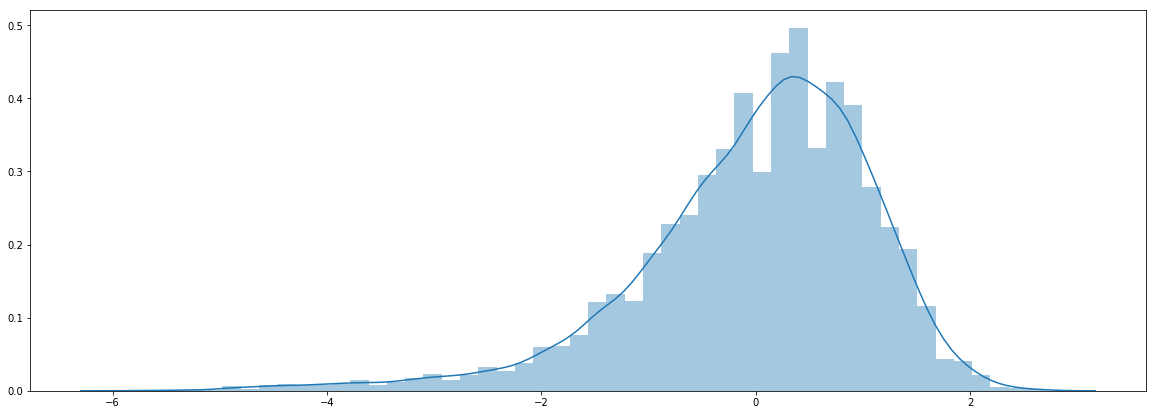

In [181]:
plt.figure(figsize=(20,7))
sns.distplot((y-y_pred))

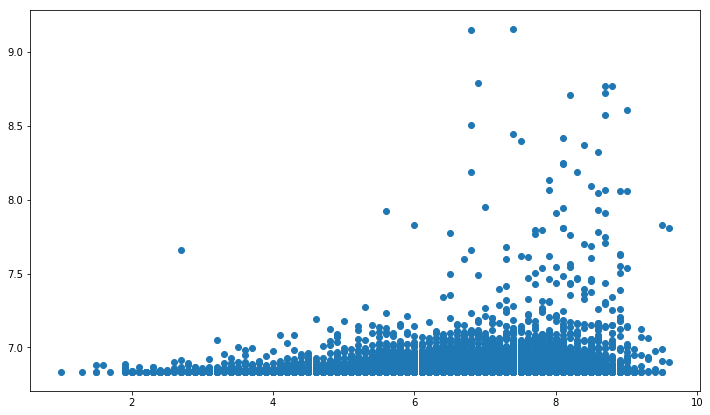

In [182]:
plt.figure(figsize=(12,7))
plt.scatter(y, y_pred)
plt.show()

In [183]:
lin_reg.intercept_

6.8306245564851968

In [184]:
lin_reg.coef_

array([ 0.00162047])

In [185]:
cdf = pd.DataFrame()
cdf['coef'] = lin_reg.coef_
cdf.index = ['nrOfPhotos']

In [186]:
cdf

,coef
nrOfPhotos,0.00162


In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [188]:
# Mean absolute error:
mean_absolute_error(y, y_pred)

0.83225239045187949

In [189]:
# Mean absolute error:
mean_squared_error(y, y_pred)

1.2009267839912954

In [190]:
# Root Mean square error:
np.sqrt(mean_squared_error(y, y_pred))

1.095868050447359

In [191]:
y_pred = lin_reg.predict(X)

### Plotting the Linear Regression Model (Entire dataset @100%) :- 

In [192]:
list_X = []
for each in X:
    list_X.append(each[0])
X = list_X
X = np.array(X)

In [193]:
X

array([19, 35, 67, ...,  0,  0,  0], dtype=int64)

In [194]:
z = pd.DataFrame()
z['X'] = X
z['y'] = y
z['y_pred'] = y_pred

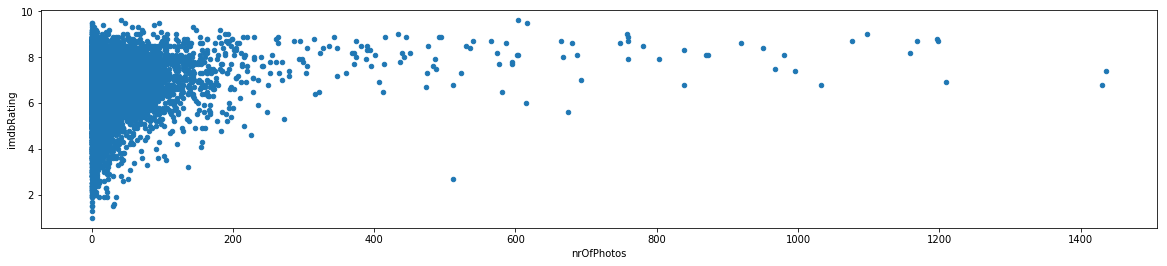

In [195]:
imdb_clean.plot(x='nrOfPhotos', y='imdbRating', kind='scatter', figsize=(20,4))

### Model Fitted Plot :-

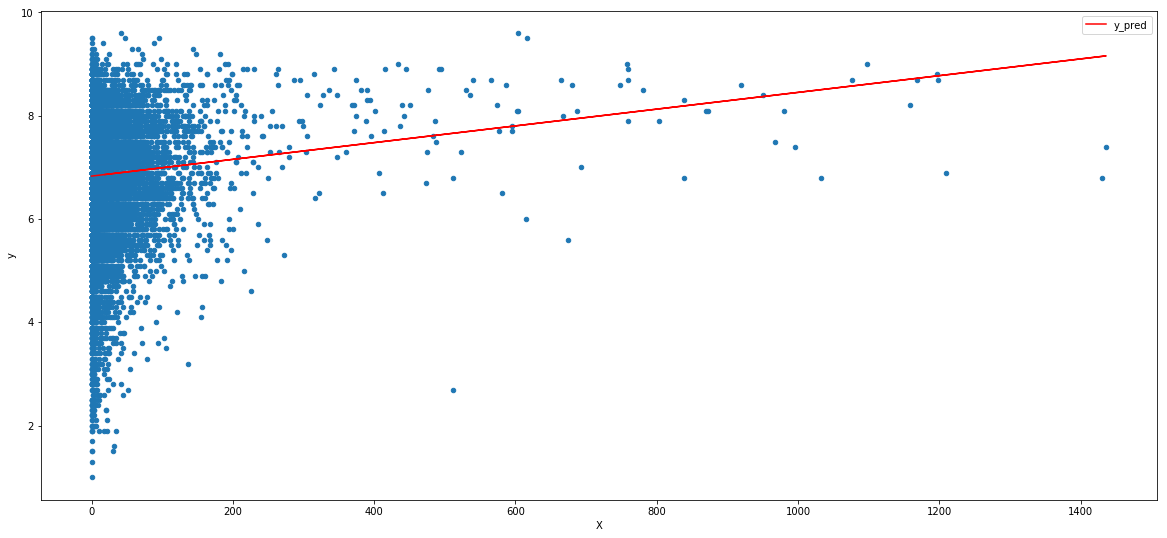

In [196]:
ax = z.plot(x='X', y='y',kind='scatter',figsize=(20,9))
z.plot(x='X', y='y_pred', kind='line',ax=ax,color='red', figsize=(20,9))

#### Random Predictions:-

In [197]:
nrOfPhotosValue = int(input("nrOfPhotos value "))

nrOfPhotos value 400


In [198]:
lin_reg.predict(nrOfPhotosValue)

array([ 7.47881333])

#### e.) imdbRating on nrOfNewsArticles :

In [199]:
X = imdb_clean[['nrOfNewsArticles']].values
y = imdb_clean['imdbRating'].values

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
lin_reg = LinearRegression()

In [203]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
y_pred = lin_reg.predict(X)

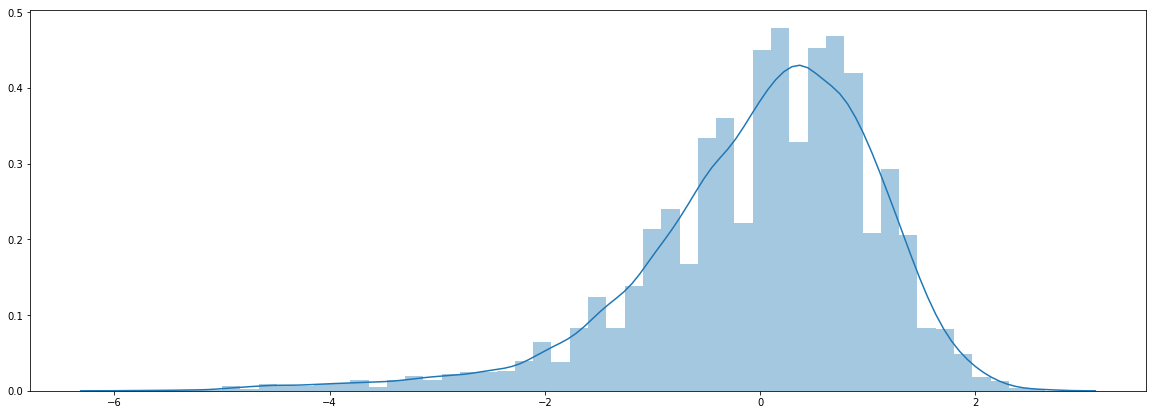

In [205]:
plt.figure(figsize=(20,7))
sns.distplot((y-y_pred))

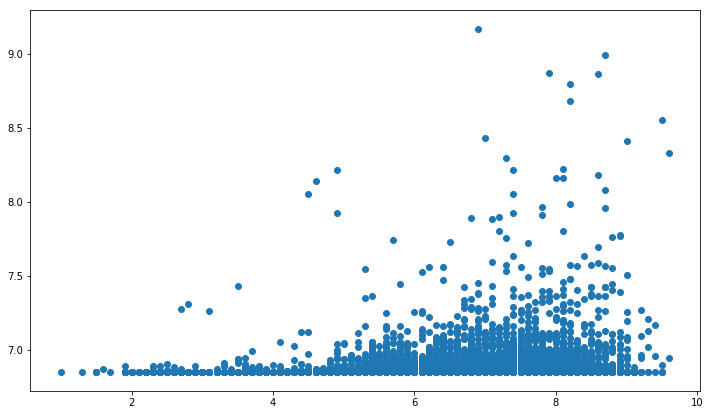

In [206]:
plt.figure(figsize=(12,7))
plt.scatter(y, y_pred)
plt.show()

In [207]:
lin_reg.intercept_

6.8481963383848052

In [208]:
lin_reg.coef_

array([  9.07217209e-05])

In [209]:
cdf = pd.DataFrame()
cdf['coef'] = lin_reg.coef_
cdf.index = ['nrOfNewsArticles']

In [210]:
cdf

,coef
nrOfNewsArticles,0.000091


In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [212]:
# Mean absolute error:
mean_absolute_error(y, y_pred)

0.83157041329369341

In [213]:
# Mean absolute error:
mean_squared_error(y, y_pred)

1.2021295092879214

In [214]:
# Root Mean square error:
np.sqrt(mean_squared_error(y, y_pred))

1.0964166677353648

In [215]:
y_pred = lin_reg.predict(X)

### Plotting the Linear Regression Model (Entire dataset @100%) :- 

In [216]:
list_X = []
for each in X:
    list_X.append(each[0])
X = list_X
X = np.array(X)

In [217]:
X

array([  96.,  110.,  428., ...,    0.,    0.,    0.])

In [218]:
z = pd.DataFrame()
z['X'] = X
z['y'] = y
z['y_pred'] = y_pred

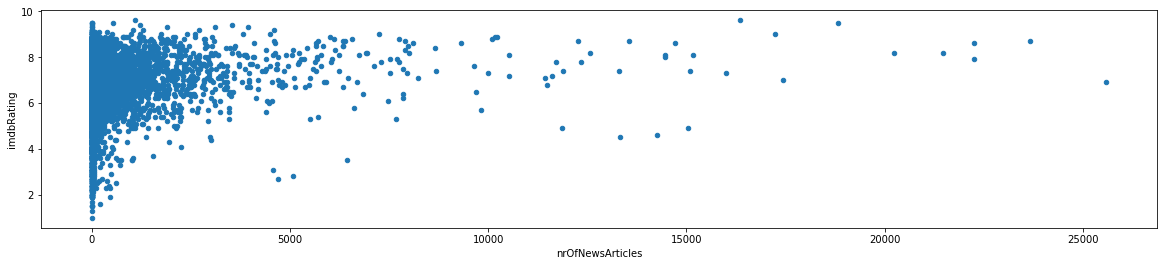

In [219]:
imdb_clean.plot(x='nrOfNewsArticles', y='imdbRating', kind='scatter', figsize=(20,4))

### Model Fitted Plot :-

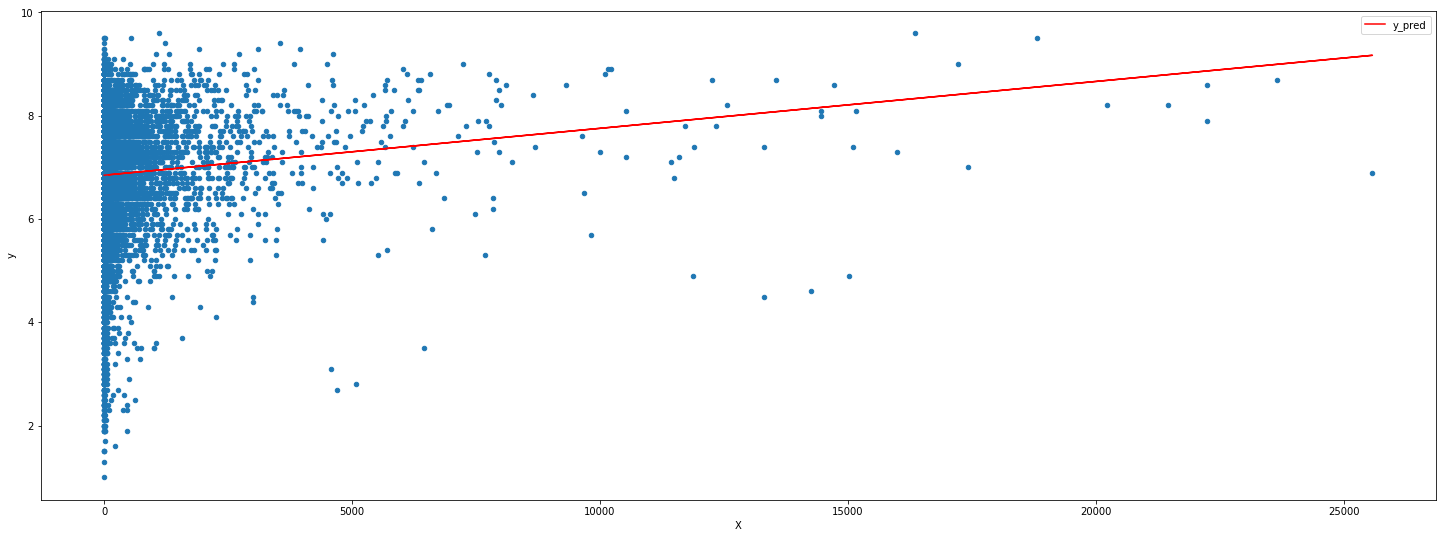

In [220]:
ax = z.plot(x='X', y='y',kind='scatter',figsize=(30,9))
z.plot(x='X', y='y_pred', kind='line',ax=ax,color='red', figsize=(25,9))

#### Random Predictions:-

In [221]:
nrOfNewsArticlesValue = int(input("nrOfNewsArticles value "))

nrOfNewsArticles value 5000


In [222]:
lin_reg.predict(nrOfNewsArticlesValue)

array([ 7.30180494])

#### f.) imdbRating on nrOfUserReviews :

In [223]:
X = imdb_clean[['nrOfUserReviews']].values
y = imdb_clean['imdbRating'].values

In [224]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [225]:
from sklearn.linear_model import LinearRegression

In [226]:
lin_reg = LinearRegression()

In [227]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [228]:
y_pred = lin_reg.predict(X)

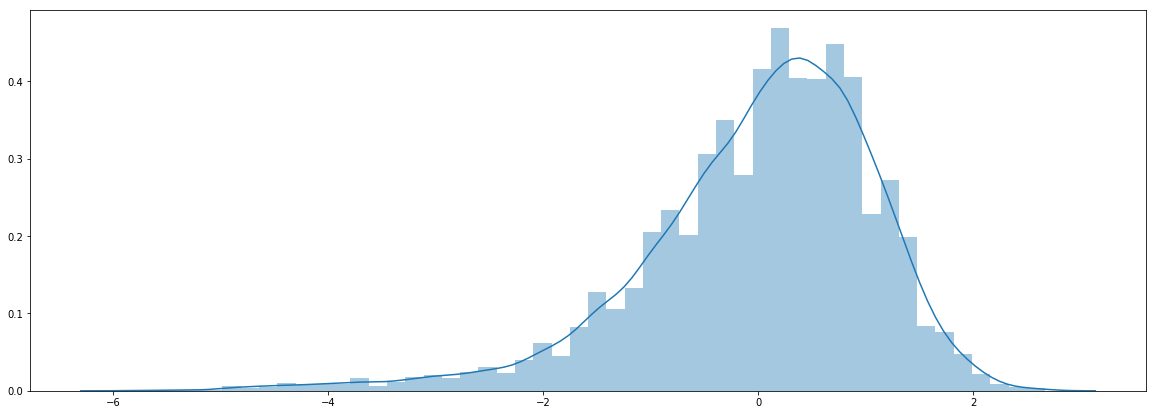

In [229]:
plt.figure(figsize=(20,7))
sns.distplot((y-y_pred))

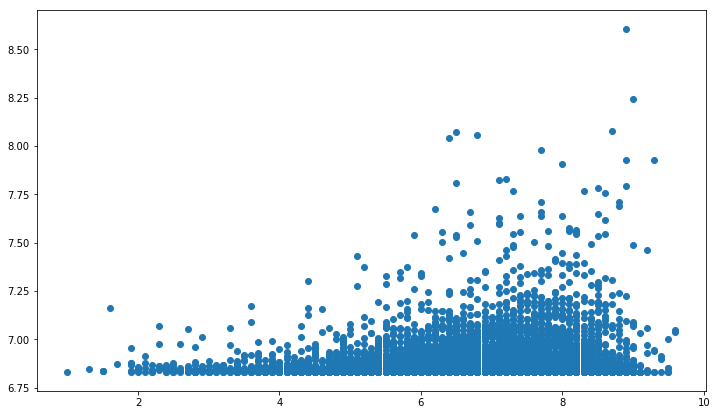

In [230]:
plt.figure(figsize=(12,7))
plt.scatter(y, y_pred)
plt.show()

In [231]:
lin_reg.intercept_

6.8309746834128742

In [232]:
lin_reg.coef_

array([ 0.00035993])

In [233]:
cdf = pd.DataFrame()
cdf['coef'] = lin_reg.coef_
cdf.index = ['nrOfUserReviews']

In [234]:
cdf

,coef
nrOfUserReviews,0.00036


In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [236]:
# Mean absolute error:
mean_absolute_error(y, y_pred)

0.83264359318239023

In [237]:
# Mean absolute error:
mean_squared_error(y, y_pred)

1.2041987150801767

In [238]:
# Root Mean square error:
np.sqrt(mean_squared_error(y, y_pred))

1.0973598840308392

In [239]:
y_pred = lin_reg.predict(X)

### Plotting the Linear Regression Model (Entire dataset @100%) :- 

In [240]:
list_X = []
for each in X:
    list_X.append(each[0])
X = list_X
X = np.array(X)

In [241]:
X

array([  85.,  122.,  376., ...,    0.,    3.,    0.])

In [242]:
z = pd.DataFrame()
z['X'] = X
z['y'] = y
z['y_pred'] = y_pred

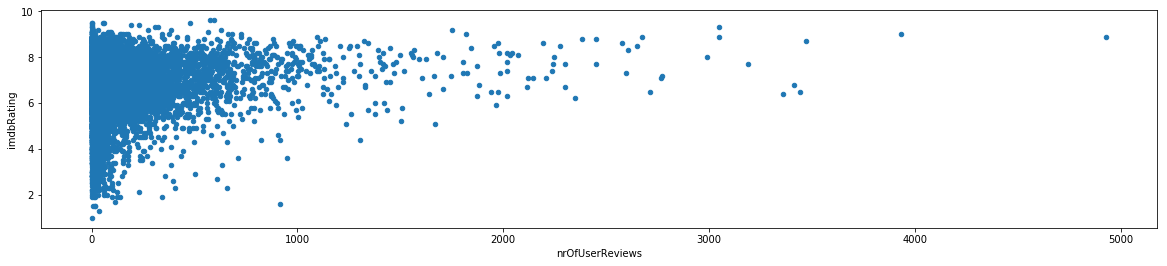

In [243]:
imdb_clean.plot(x='nrOfUserReviews', y='imdbRating', kind='scatter', figsize=(20,4))

### Model Fitted Plot :-

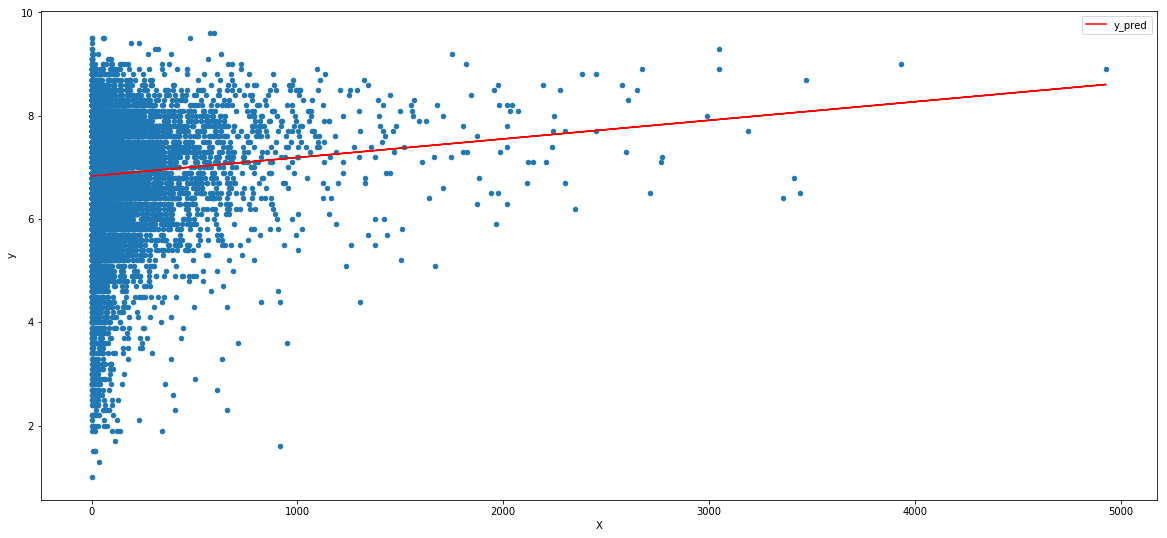

In [244]:
ax = z.plot(x='X', y='y',kind='scatter',figsize=(20,9))
z.plot(x='X', y='y_pred', kind='line',ax=ax,color='red', figsize=(20,9))

#### Random Predictions:-

In [245]:
nrOfUserReviewsValue = int(input("nrOfUserReviews value "))

nrOfUserReviews value 1000


In [246]:
lin_reg.predict(nrOfUserReviewsValue)

array([ 7.19090565])

In [247]:
# linear regresion ends

# POLYNOMIAL REGRESSION MODEL:

In [248]:
'''
The best polynolial fitted curve seems to be on plot 'ratingCount' vs 'imdbRating' :
'''

"\nThe best polynolial fitted curve seems to be on plot 'ratingCount' vs 'imdbRating' :\n"

#### > ratingCount vs imdbRating :-

In [337]:
imdb_clean = pd.read_csv(r"E:/pythON/DataSci/GitH/IMDB/Clean_IMDB_3.csv")

In [338]:
imdb_clean.sort_values(by='ratingCount',inplace=True)

In [339]:
imdb_clean.head()

,imdbRating,ratingCount,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
7846,6.0,5,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6987,5.4,5,0,0,0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7253,4.2,5,0,0,0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5572,6.2,5,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7583,5.8,5,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [340]:
X = imdb_clean.iloc[:, 1:2].values
y = imdb_clean.iloc[:,0:1].values

In [341]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [342]:
from sklearn.preprocessing import PolynomialFeatures

In [343]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [344]:
from sklearn.linear_model import LinearRegression

In [345]:
linear = LinearRegression()
linear.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [346]:
y_predicted = linear.predict(X_poly)

In [347]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [348]:
# mean squared error :
mean_squared_error(y, y_predicted)

1.1794537805608265

In [349]:
# mean absolute error :
mean_absolute_error(y, y_predicted)

0.82329242445794404

In [350]:
# root mean squared error : 
np.sqrt(mean_squared_error(y, y_predicted))

1.0860266021423355

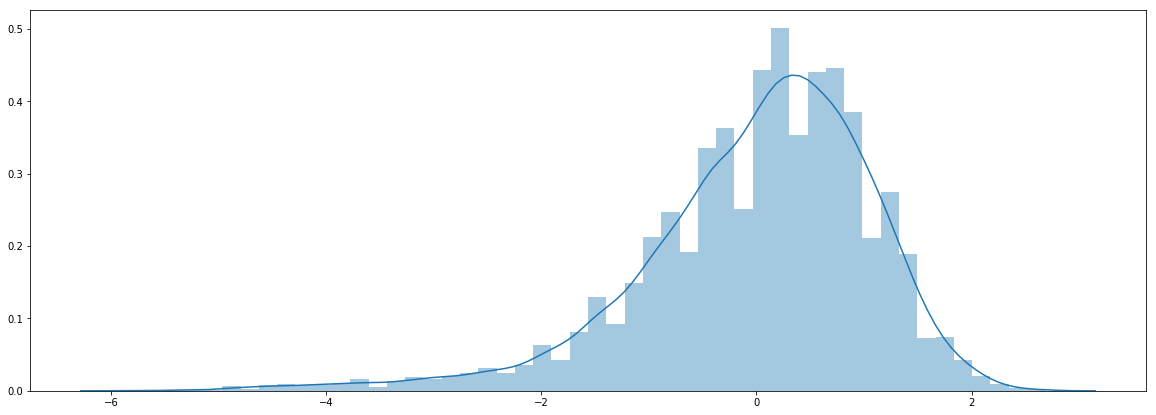

In [351]:
plt.figure(figsize=(20,7))
sns.distplot((y-y_predicted))

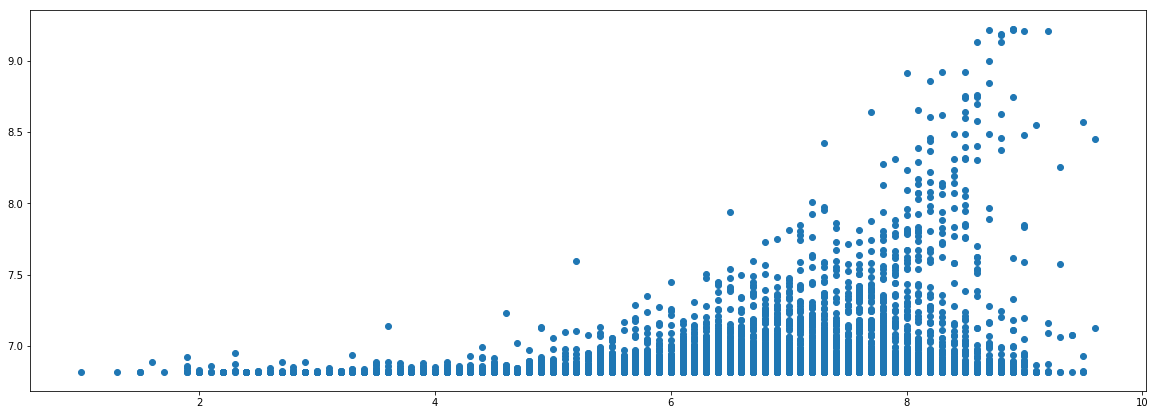

In [352]:
plt.figure(figsize=(20,7))
plt.scatter(y, y_predicted)
plt.show()

### Model fitted Plot @100% dataset:-

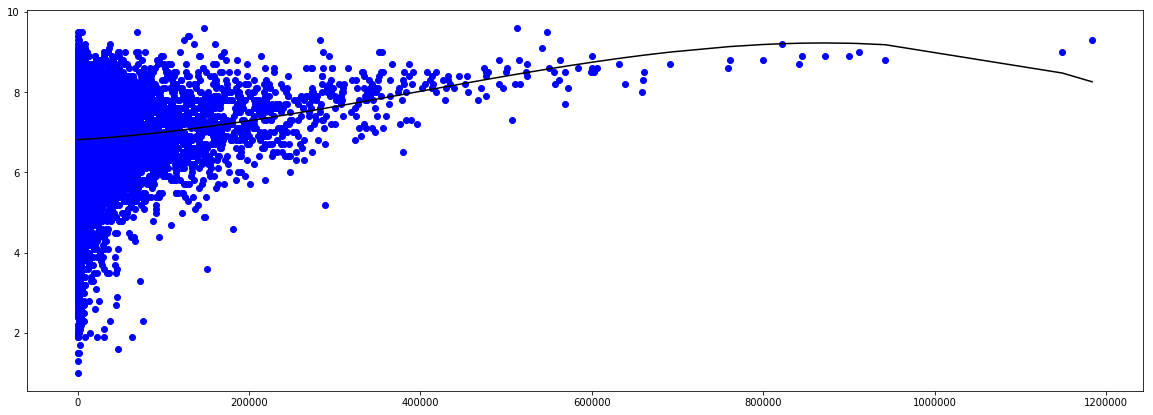

In [355]:
plt.figure(figsize=(20,7))
plt.scatter(X, y, color='blue')
plt.plot(X, linear.predict(poly_reg.fit_transform(X)),color='black')
plt.show()

### Testing Random Predictions :-

In [334]:
rating_Count_value = int(input("Rating Count value "))

Rating Count value 200000


In [335]:
linear.predict(poly_reg.fit_transform(rating_Count_value))

array([[ 7.28823128]])

# SUPPORT VECTOR REGRESSION MODEL :-

###  > SVR: 'imdbRating' on [ 'ratingCount', 'nrOfWins', 'nrOfNominations','nrOfPhotos', 'nrOfNewsArticles',           'nrOfUserReviews', 'nrOfGenre'] 

In [356]:
imdb_clean.columns

Index(['imdbRating', 'ratingCount', 'nrOfWins', 'nrOfNominations',
       'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'FilmNoir',
       'GameShow', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport', 'TalkShow',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [357]:
imdb_clean.head()

,imdbRating,ratingCount,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
7846,6.0,5,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6987,5.4,5,0,0,0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7253,4.2,5,0,0,0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5572,6.2,5,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7583,5.8,5,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
X = imdb_clean[['ratingCount','nrOfWins','nrOfNominations','nrOfPhotos','nrOfNewsArticles','nrOfUserReviews','nrOfGenre']].values
y = imdb_clean['imdbRating'].values

In [359]:
from sklearn.preprocessing import StandardScaler

In [360]:
scale_x = StandardScaler()
scale_y = StandardScaler()

##### Feature Scaling (independent parameters):-

In [361]:
X = scale_x.fit_transform(X)

In [362]:
from sklearn.svm import SVR

In [363]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Testing Random Predictions :-

In [364]:
real_X_input_features = np.array([70550, 1, 0, 19, 96.0, 85.0, 3.0])
real_X_input_features

array([  7.05500000e+04,   1.00000000e+00,   0.00000000e+00,
         1.90000000e+01,   9.60000000e+01,   8.50000000e+01,
         3.00000000e+00])

In [365]:
scaled_X_input_features = scale_x.transform([real_X_input_features])
scaled_X_input_features

array([[ 0.63907588, -0.25807999, -0.30320197, -0.11820103, -0.17110825,
        -0.13952934,  0.87209015]])

In [366]:
y_predicted = svr_regressor.predict(scaled_X_input_features)
y_predicted

array([ 6.81088098])

In [367]:
# Kfold cross validation :-

In [368]:
from sklearn.model_selection import cross_val_score

In [369]:
accuracy = cross_val_score(estimator=svr_regressor, X=X_train, y=y_train, cv=10, n_jobs=-1)

In [370]:
print("accuracy.mean ",accuracy.mean())
print("accuracy.std ",accuracy.std())

accuracy.mean  -0.0111206102494
accuracy.std  0.0130816765128


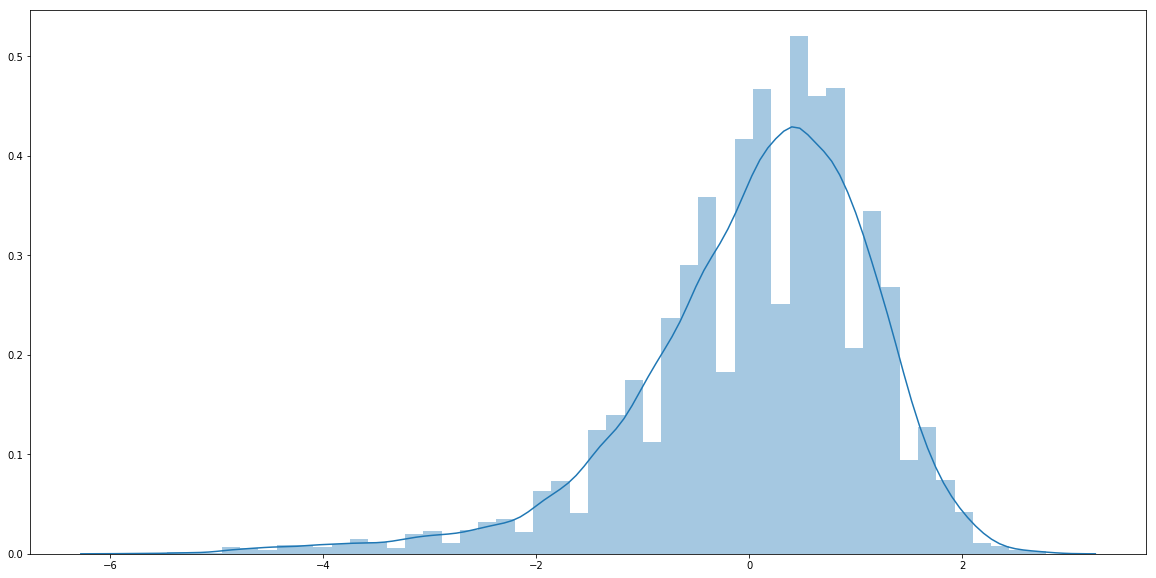

In [371]:
plt.figure(figsize=(20,10))
sns.distplot((y-y_predicted))

### > SVR :  'imdbRating' on 'ratingCount' :-

In [377]:
imdb_clean = pd.read_csv(r"E:/pythON/DataSci/GitH/IMDB/Clean_IMDB_3.csv")

In [378]:
imdb_clean.sort_values(by='ratingCount',inplace=True)

In [379]:
X = imdb_clean.iloc[:,1:2].values
y = imdb_clean.iloc[:,0:1].values

In [380]:
from sklearn.preprocessing import StandardScaler

In [381]:
scale_x = StandardScaler()
scale_y = StandardScaler()

In [382]:
X = scale_x.fit_transform(X)
y = scale_y.fit_transform(y)

C:\anaconda5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [383]:
from sklearn.svm import SVR

In [384]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X, y)

C:\anaconda5\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [385]:
predictions = svr_regressor.predict(X)
predictions = scale_y.inverse_transform(predictions)
predictions

array([ 7.0088307 ,  7.0088307 ,  7.0088307 , ...,  8.72938716,
        8.93234276,  9.19025004])

In [386]:
q = scale_y.inverse_transform(y)
y_proper = []
for each in q:
    y_proper.append(each[0])
y_proper
    

[6.0,
 5.4000000000000004,
 4.2000000000000002,
 6.2000000000000002,
 5.7999999999999998,
 7.0,
 6.5999999999999996,
 6.7999999999999998,
 9.0,
 8.1999999999999993,
 8.1999999999999993,
 6.0,
 5.4000000000000004,
 5.4000000000000004,
 8.1999999999999993,
 7.2000000000000002,
 5.4000000000000004,
 2.3999999999999986,
 2.7999999999999998,
 7.5999999999999996,
 8.0,
 6.5999999999999996,
 8.4000000000000004,
 6.4000000000000004,
 6.7999999999999998,
 6.5999999999999996,
 6.0,
 7.7999999999999998,
 2.7999999999999998,
 6.4000000000000004,
 8.1999999999999993,
 8.4000000000000004,
 7.0,
 7.7999999999999998,
 5.7999999999999998,
 7.2000000000000002,
 8.1999999999999993,
 5.7999999999999998,
 7.5999999999999996,
 7.2000000000000002,
 7.4000000000000004,
 7.2000000000000002,
 8.0,
 6.2000000000000002,
 7.0,
 4.4000000000000004,
 5.7999999999999998,
 8.3000000000000007,
 5.2000000000000002,
 6.0,
 7.7999999999999998,
 5.7000000000000002,
 6.2999999999999998,
 7.7000000000000002,
 9.1999999999999

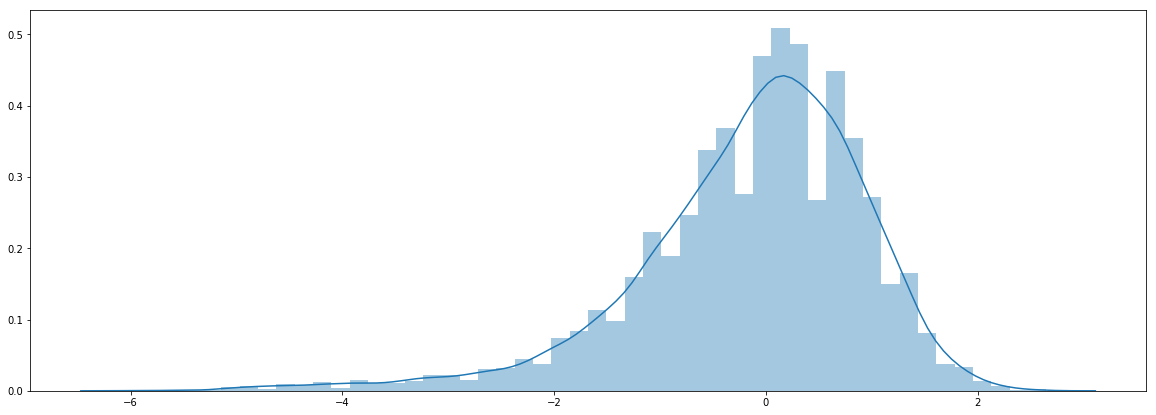

In [387]:
plt.figure(figsize=(20,7))
sns.distplot((y_proper-predictions))

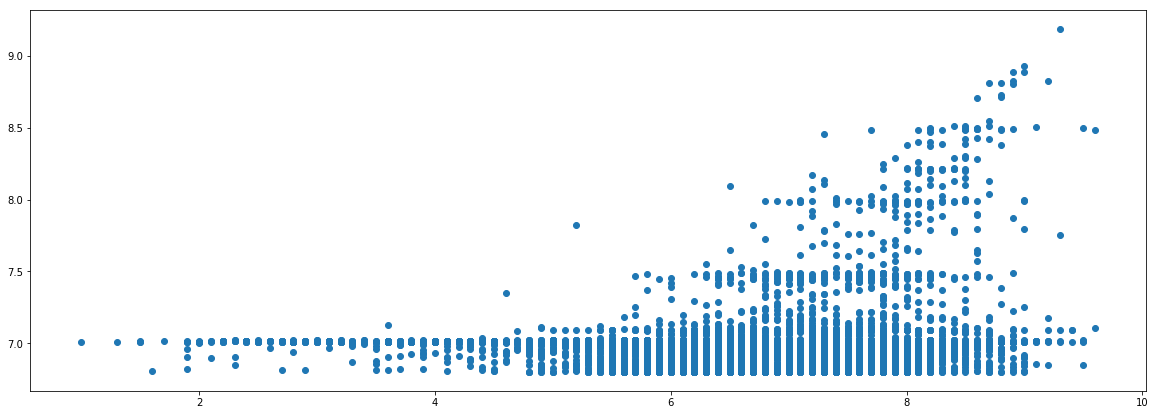

In [388]:
plt.figure(figsize=(20,7))
plt.scatter(x=y_proper,y=predictions)
plt.show()

In [389]:
y_pred = svr_regressor.predict(scale_x.transform(np.array([[120000]])))

C:\anaconda5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [390]:
scale_y.inverse_transform(y_pred)

array([ 7.0934507])

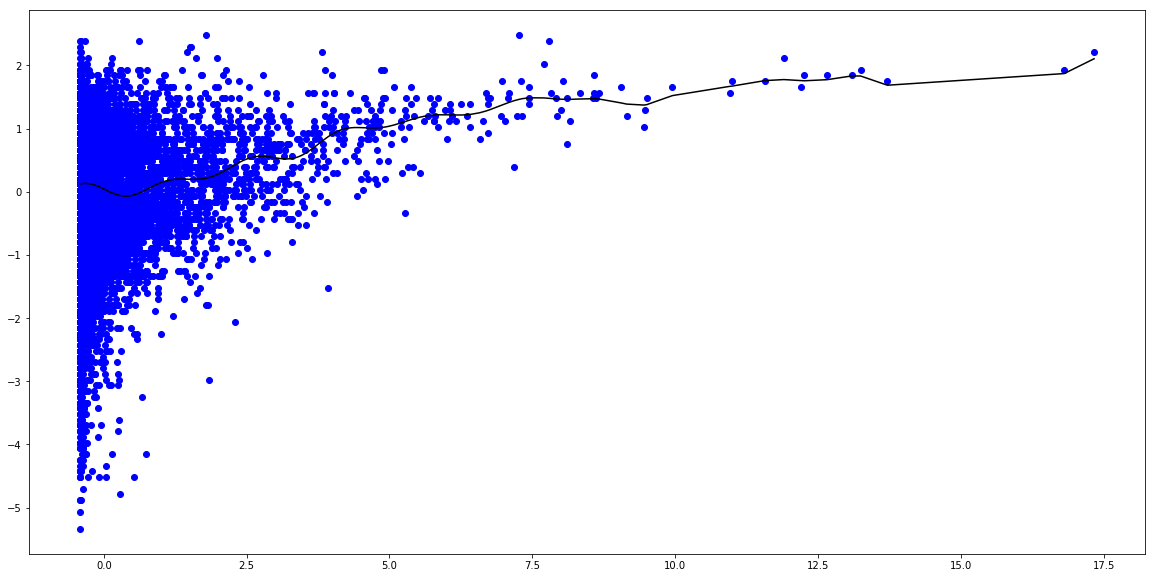

In [391]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, color='blue')
plt.plot(X, svr_regressor.predict(X), color='black')
plt.show()

### Testing Random Predictions :-

In [392]:
rating_Count_value = int(input("Rating Count value "))

Rating Count value 200000


In [393]:
scaled_x_input_value = scale_x.transform(rating_Count_value) 

In [394]:
scaled_y_predicted_value = svr_regressor.predict(scaled_x_input_value)

In [395]:
scaled_y_predicted_value

array([ 0.53986096])

In [396]:
#  Rescaling 'scaled_y_predicted_value'

In [397]:
y_predicted_true_value = scale_y.inverse_transform(scaled_y_predicted_value)

In [398]:
y_predicted_true_value

array([ 7.4680455])

### > SVR: imdbRating on nrOfWins :-

In [399]:
imdb_clean = pd.read_csv(r"Clean_IMDB_3.csv")
imdb_clean.sort_values(by='nrOfWins',inplace=True)

In [400]:
imdb_clean.head()

,imdbRating,ratingCount,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
6377,7.5,105,0,0,0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7251,7.3,990,0,0,14,14.0,23.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,7.4,7,0,0,0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7253,4.2,5,0,0,0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7256,7.9,4758,0,0,16,24.0,37.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
X = imdb_clean.iloc[:,2:3].values
y = imdb_clean.iloc[:,0:1].values

In [402]:
from sklearn.preprocessing import StandardScaler

In [403]:
scale_x = StandardScaler()
scale_y = StandardScaler()

In [404]:
X = scale_x.fit_transform(X)
y = scale_y.fit_transform(y)

C:\anaconda5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [405]:
from sklearn.svm import SVR

In [406]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X, y)

C:\anaconda5\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

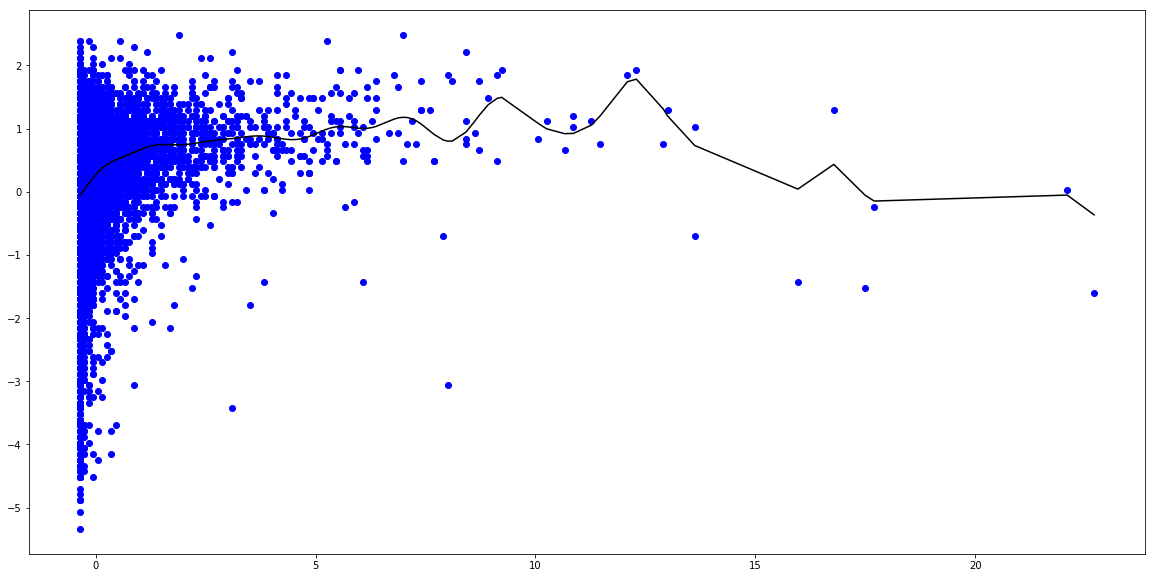

In [408]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, color='blue')
plt.plot(X, svr_regressor.predict(X), color='black')
plt.show()

In [409]:
y_proper = []
for each in y:
    y_proper.append(each[0])
y_proper = scale_y.inverse_transform(y_proper)
y_proper

array([ 7.5,  7.3,  7.4, ...,  6.6,  6.9,  5.1])

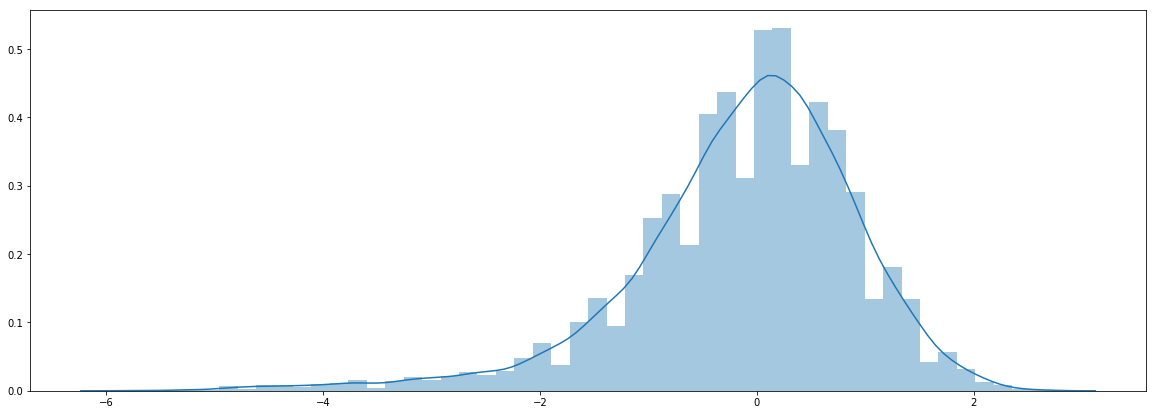

In [410]:
plt.figure(figsize=(20, 7))
sns.distplot(y_proper - scale_y.inverse_transform(svr_regressor.predict(X)))